In [1]:
# ===============================================
# BLOQUE DE CARGA DE DATASETS
# ===============================================

import pandas as pd

# Rutas de datasets
path_original = "diabetes_prediction_dataset.csv"
path_sintetico = "dataset_timeseries_realista_con_target.csv"
path_smoteenn = "dataset_balanceado_SMOTEENN.csv"

# Cargar datasets
df_original = pd.read_csv(path_original)
df_sintetico = pd.read_csv(path_sintetico)
df_smoteenn = pd.read_csv(path_smoteenn)

# Mostrar shapes como verificación
print("📂 Datasets cargados correctamente")
print(f"Original: {df_original.shape}")
print(f"Sintético: {df_sintetico.shape}")
print(f"SMOTEENN: {df_smoteenn.shape}")

# Verificar columnas
print("\n🔎 Columnas disponibles en cada dataset:")
print("Original:", df_original.columns.tolist())
print("Sintético:", df_sintetico.columns.tolist())
print("SMOTEENN:", df_smoteenn.columns.tolist())


📂 Datasets cargados correctamente
Original: (100000, 9)
Sintético: (300000, 13)
SMOTEENN: (994916, 24)

🔎 Columnas disponibles en cada dataset:
Original: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
Sintético: ['patient_id', 'visit', 'age', 'gender', 'smoking_history', 'diabetes', 'hypertension', 'blood_glucose_level', 'HbA1c_level', 'systolic_bp', 'diastolic_bp', 'bmi', 'target']
SMOTEENN: ['patient_id', 'visit', 'age', 'diabetes', 'hypertension', 'blood_glucose_level', 'HbA1c_level', 'systolic_bp', 'diastolic_bp', 'bmi', 'glucose_hba1c_ratio', 'bmi_age_interaction', 'pulse_pressure', 'glucose_log', 'bmi_sqrt', 'hba1c_squared', 'glucose_patient_mean', 'hba1c_last', 'glucose_lag1', 'glucose_diff', 'glucose_roll3', 'hba1c_lag1', 'hba1c_diff', 'target']



📂 Analizando dataset: Original


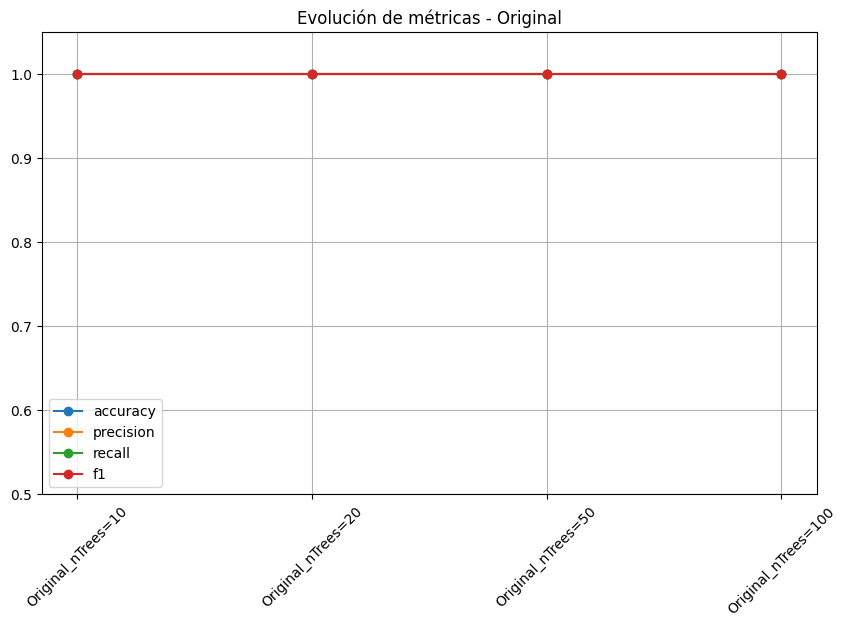


📂 Analizando dataset: Sintético


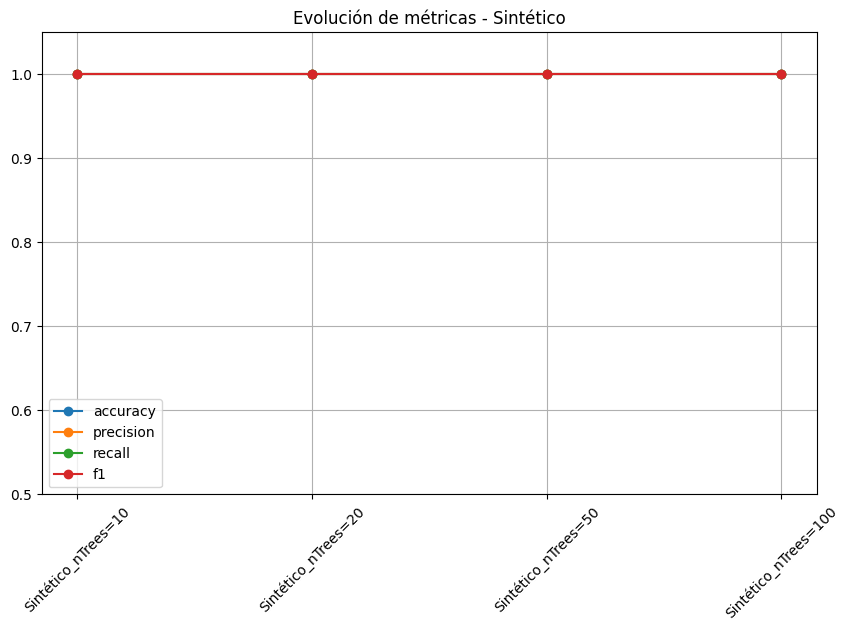


📂 Analizando dataset: SMOTEENN


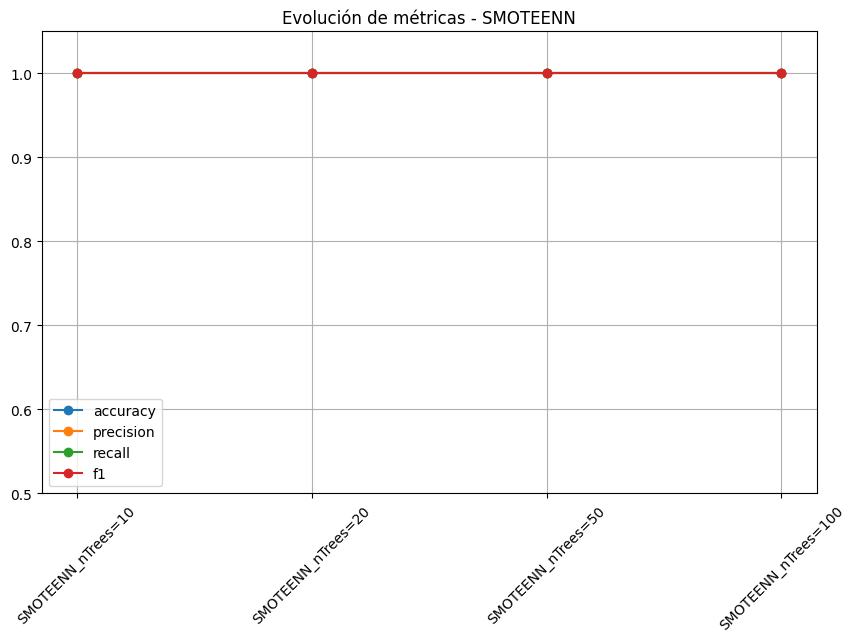

In [4]:
# ===============================================
# 1.1 SISTEMA DE MONITOREO BÁSICO DE MÉTRICAS
# ===============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
import matplotlib.pyplot as plt

# ----------------------
# Función robusta para cargar dataset
# ----------------------
def load_dataset(path, name):
    df = pd.read_csv(path)
    if "target" not in df.columns and "diabetes" in df.columns and "hypertension" in df.columns:
        df["target"] = df["diabetes"].astype(int) + df["hypertension"].astype(int) * 2
        mapping = {0: -1, 1: 0, 2: 1, 3: 2}
        df["target"] = df["target"].map(mapping)
    return df

# ----------------------
# Función de tracking
# ----------------------
def track_metrics(y_true, y_pred, history, step_name):
    history["step"].append(step_name)
    history["accuracy"].append(accuracy_score(y_true, y_pred))
    history["precision"].append(precision_score(y_true, y_pred, average="macro"))
    history["recall"].append(recall_score(y_true, y_pred, average="macro"))
    history["f1"].append(f1_score(y_true, y_pred, average="macro"))
    return history

def run_tracking(df, name):
    print(f"\n📂 Analizando dataset: {name}")

    X = df.select_dtypes(include=["number"]).drop(columns=["target"], errors="ignore")
    y = df["target"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    history = {"step": [], "accuracy": [], "precision": [], "recall": [], "f1": []}
    model = RandomForestClassifier(random_state=42)

    for trees in [10, 20, 50, 100]:
        model.set_params(n_estimators=trees)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        history = track_metrics(y_test, y_pred, history, f"{name}_nTrees={trees}")

    df_history = pd.DataFrame(history)

    plt.figure(figsize=(10, 6) dpi=300)
    for metric in ["accuracy", "precision", "recall", "f1"]:
        plt.plot(df_history["step"], df_history[metric], marker="o", label=metric)
    plt.title(f"Evolución de métricas - {name}")
    plt.xticks(rotation=45)
    plt.ylim(0.5, 1.05)
    plt.legend()
    plt.grid(True)
    plt.show()

    return df_history

# ----------------------
# Cargar datasets
# ----------------------
df_original   = load_dataset("diabetes_prediction_dataset.csv", "Original")
df_sintetico  = load_dataset("dataset_timeseries_realista_con_target.csv", "Sintético")
df_smoteenn   = load_dataset("dataset_balanceado_SMOTEENN.csv", "SMOTEENN")

# ----------------------
# Tracking
# ----------------------
history_original  = run_tracking(df_original, "Original")
history_sintetico = run_tracking(df_sintetico, "Sintético")
history_smoteenn  = run_tracking(df_smoteenn, "SMOTEENN")


✅ Original: target creado desde diabetes + hypertension

📂 Tracking scikit-learn para Original


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


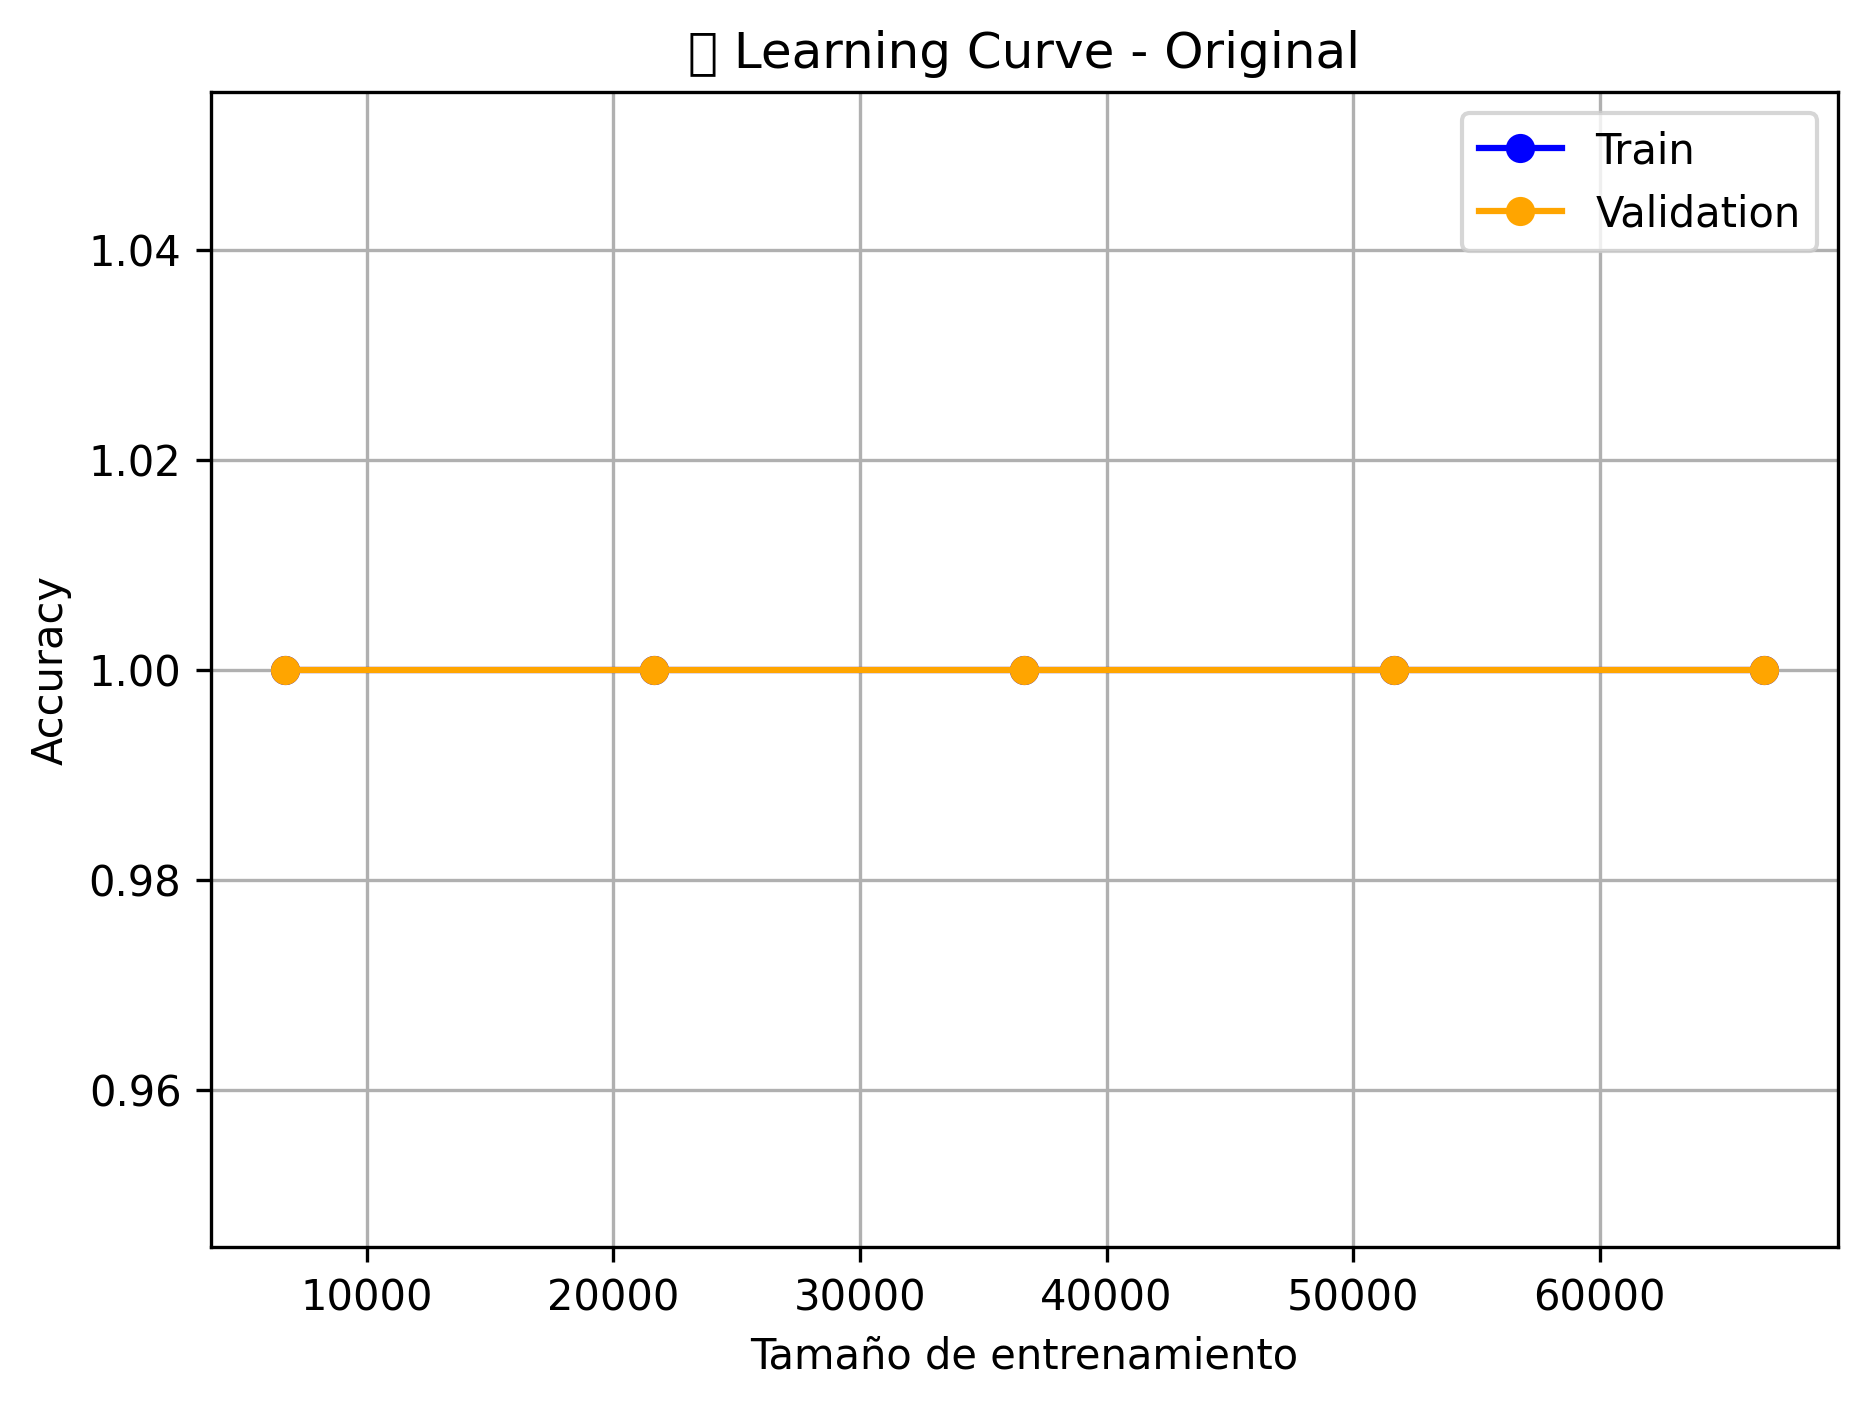

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


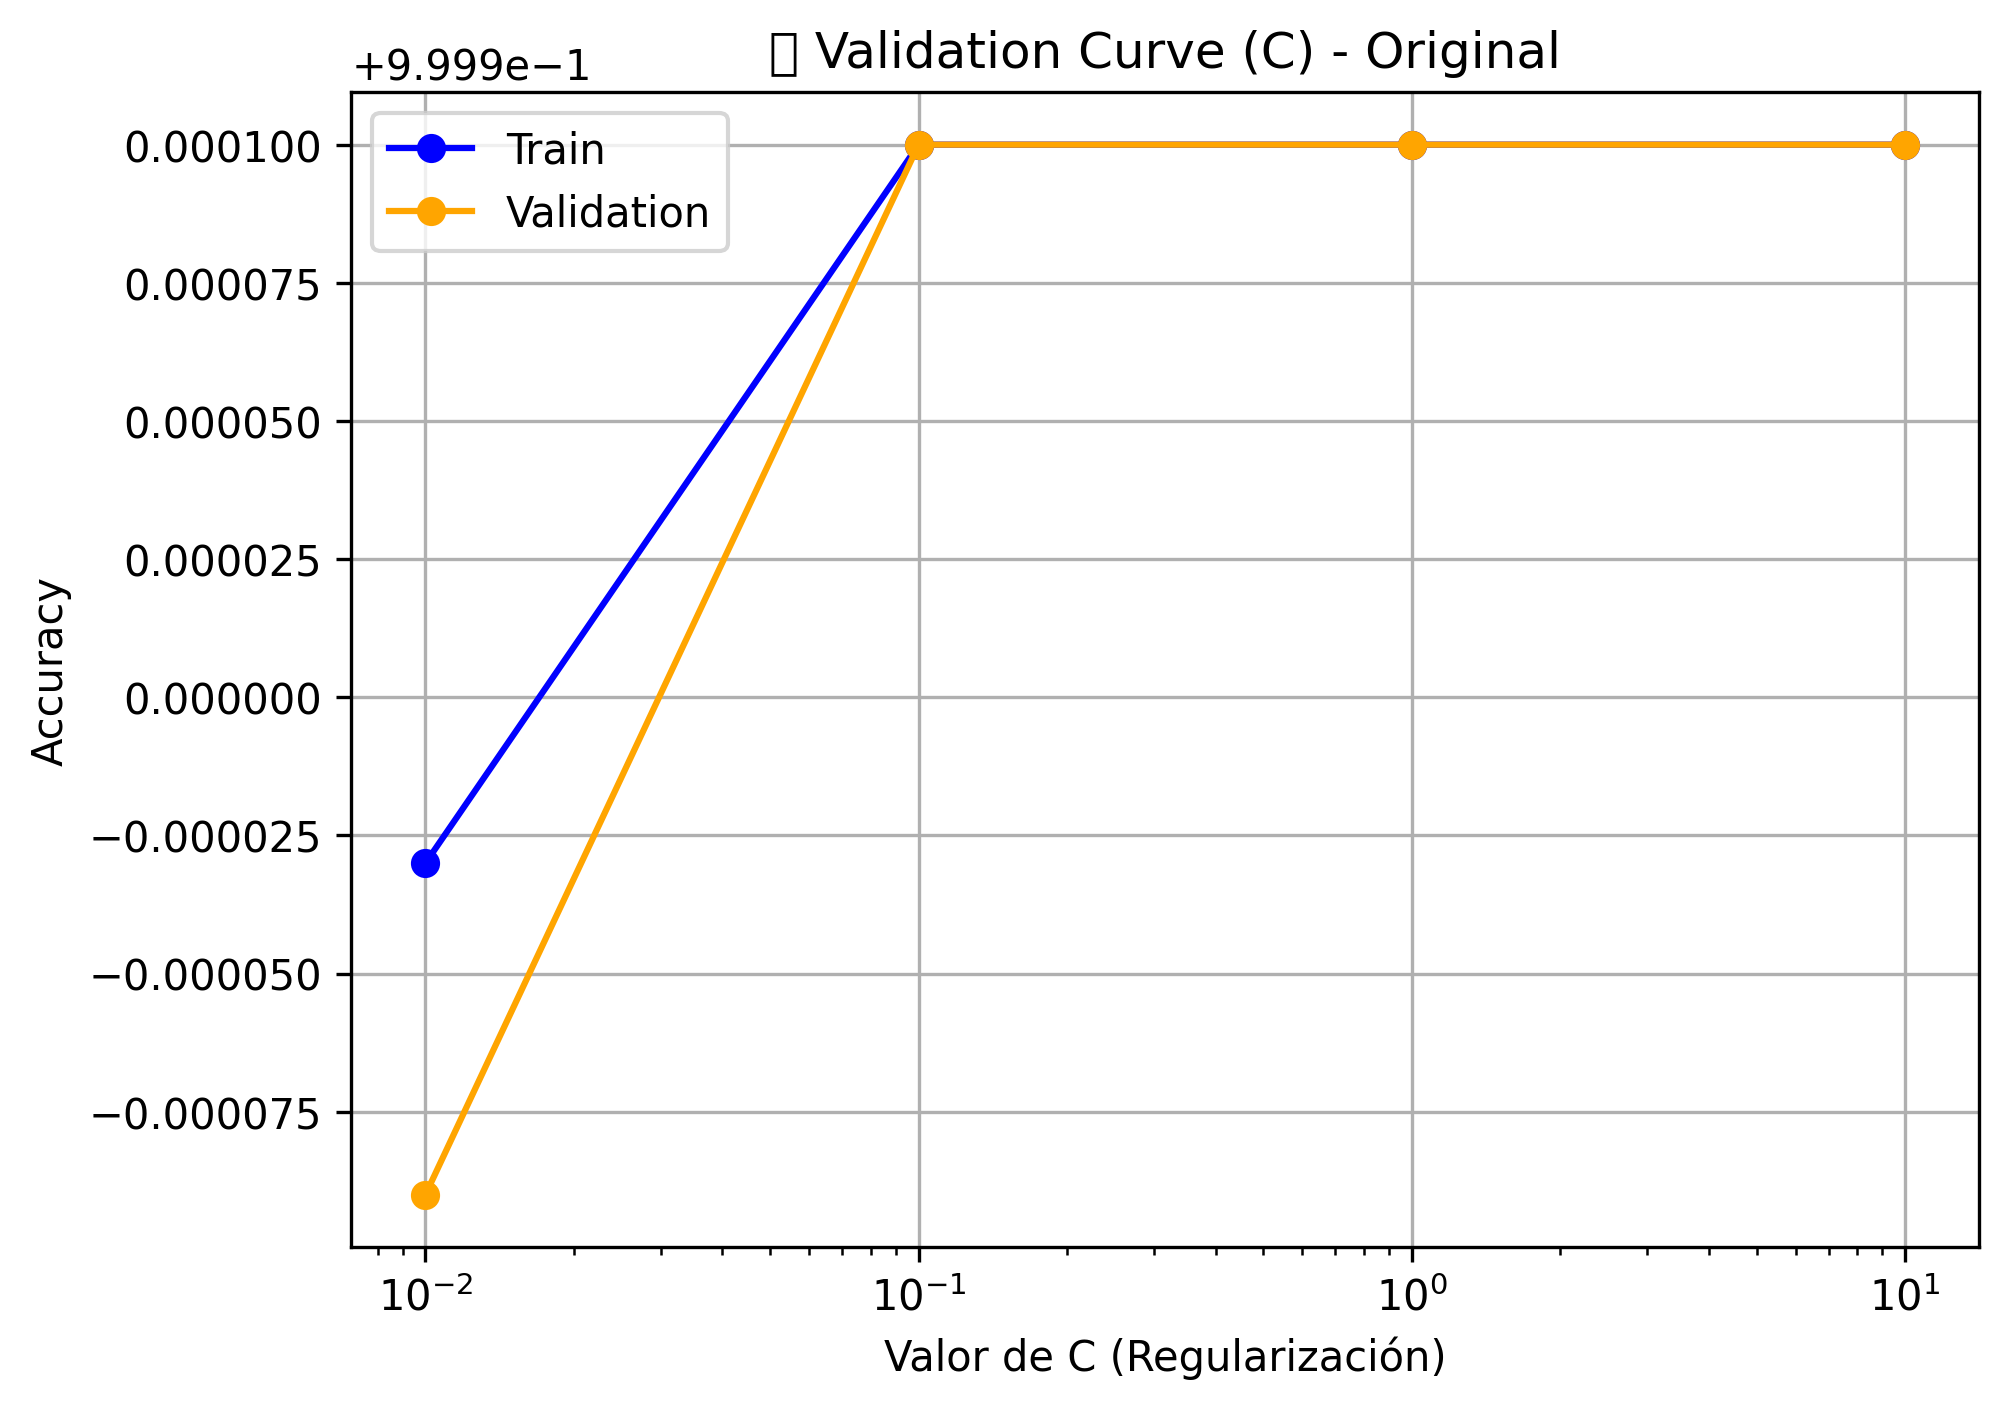


📂 Tracking scikit-learn para Sintético


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


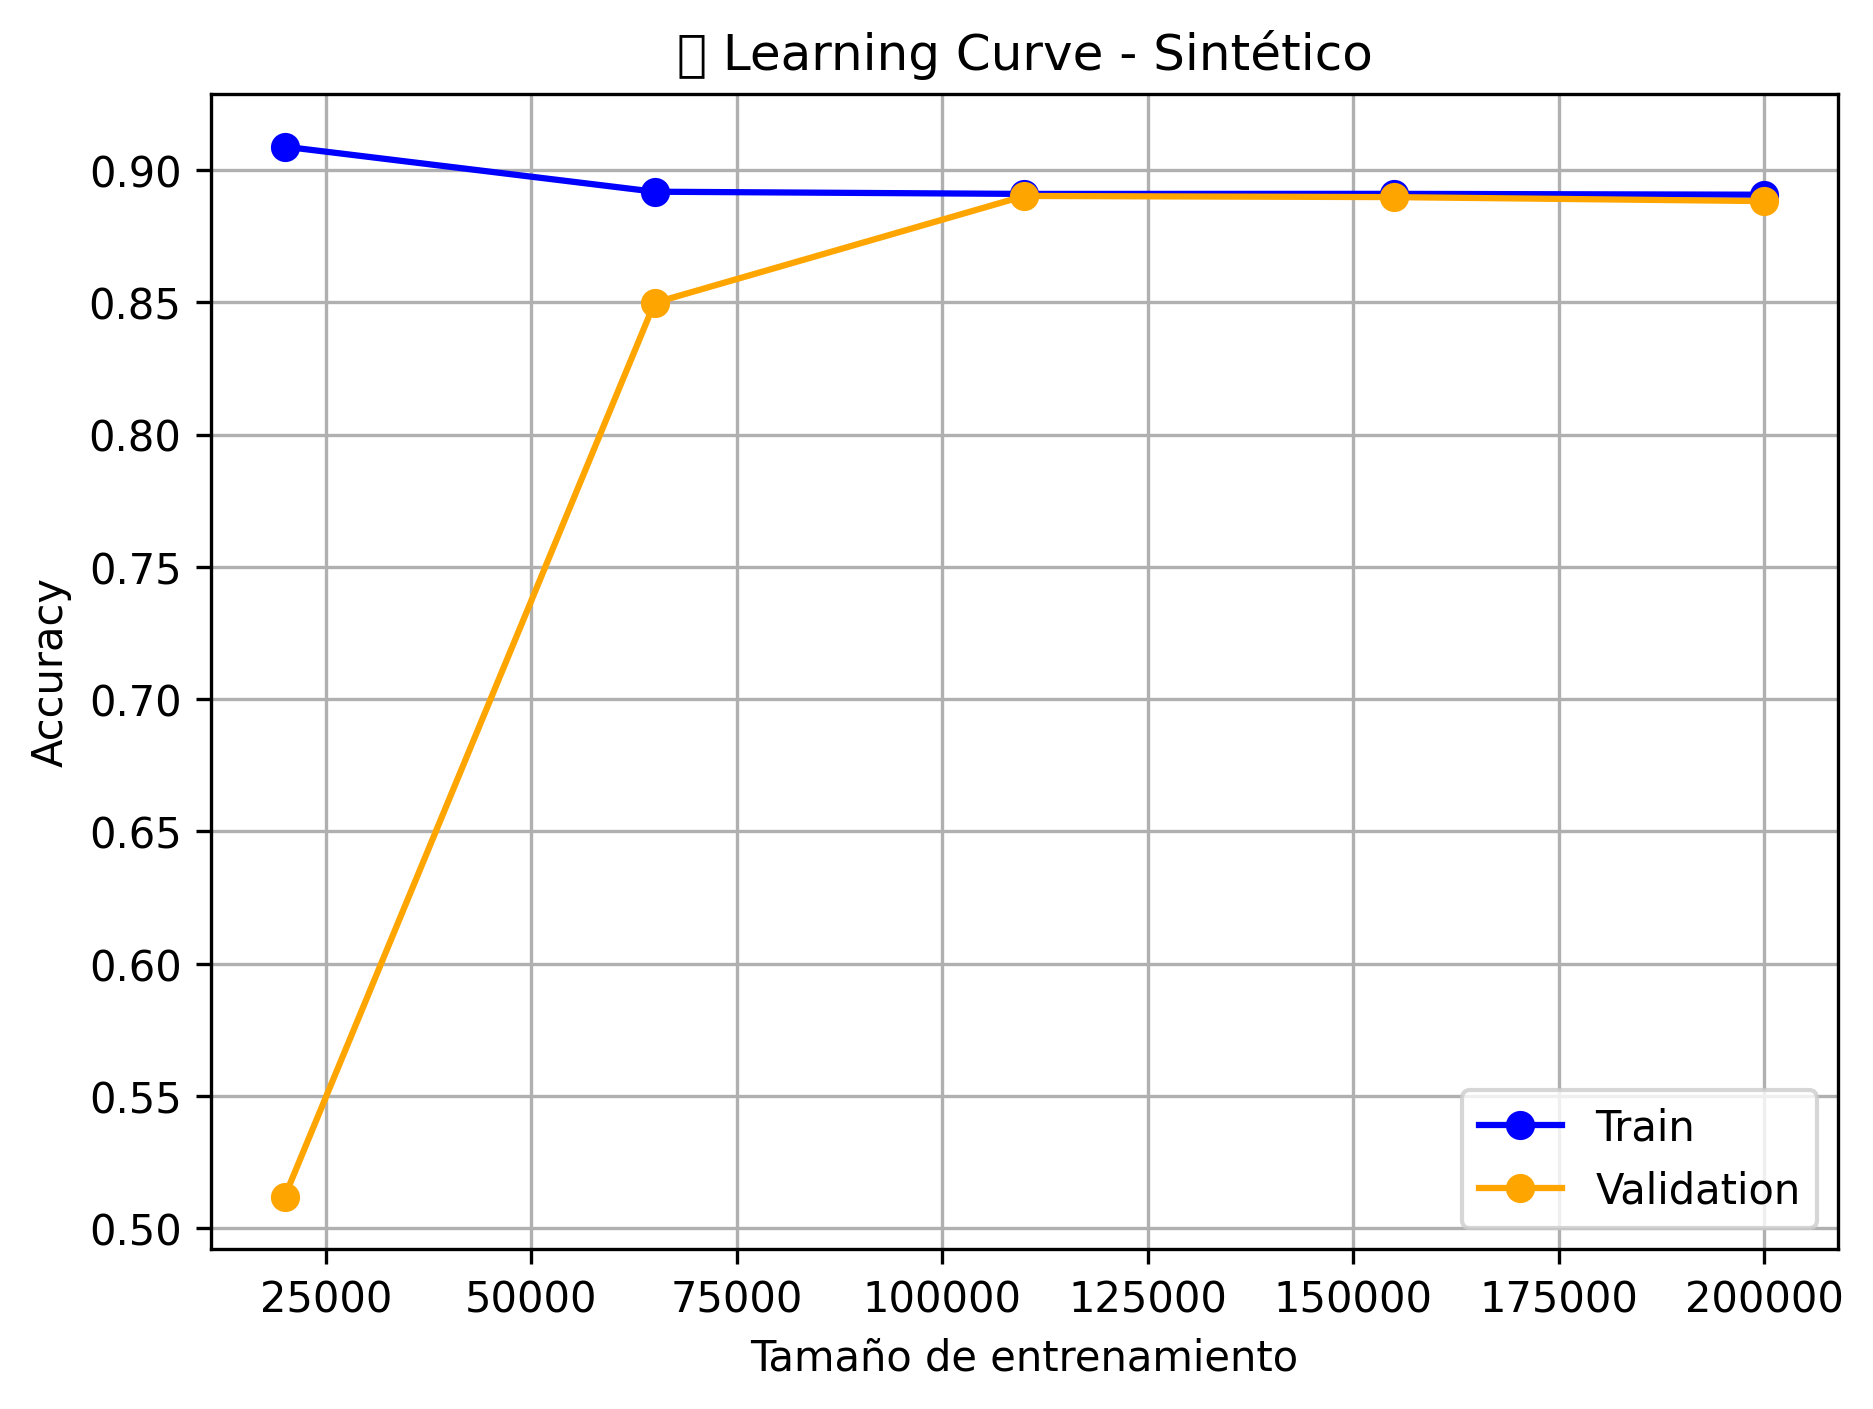

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


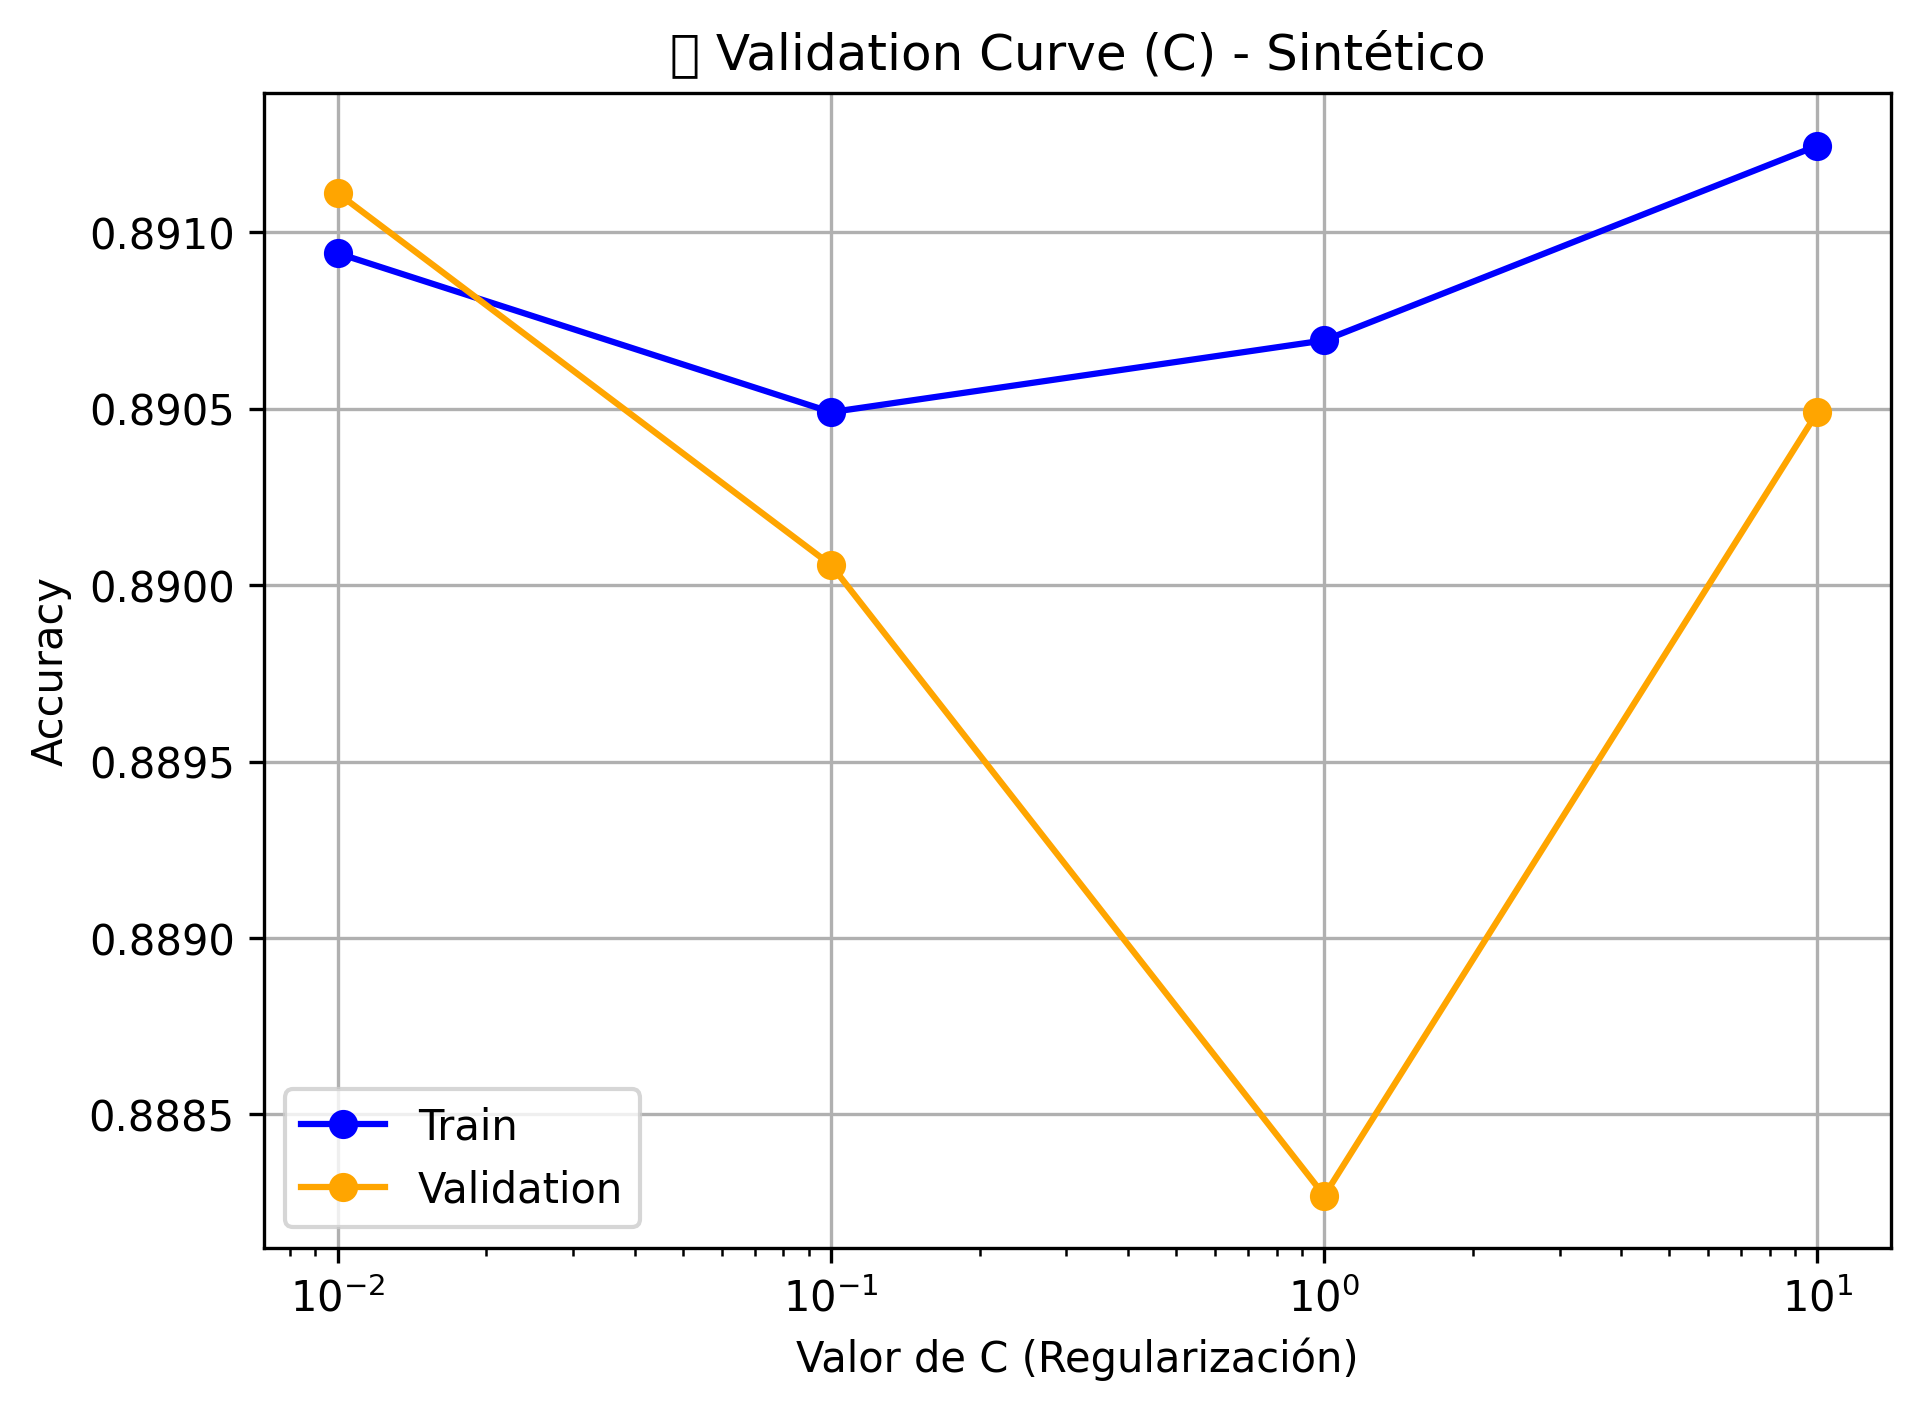


📂 Tracking scikit-learn para SMOTEENN


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


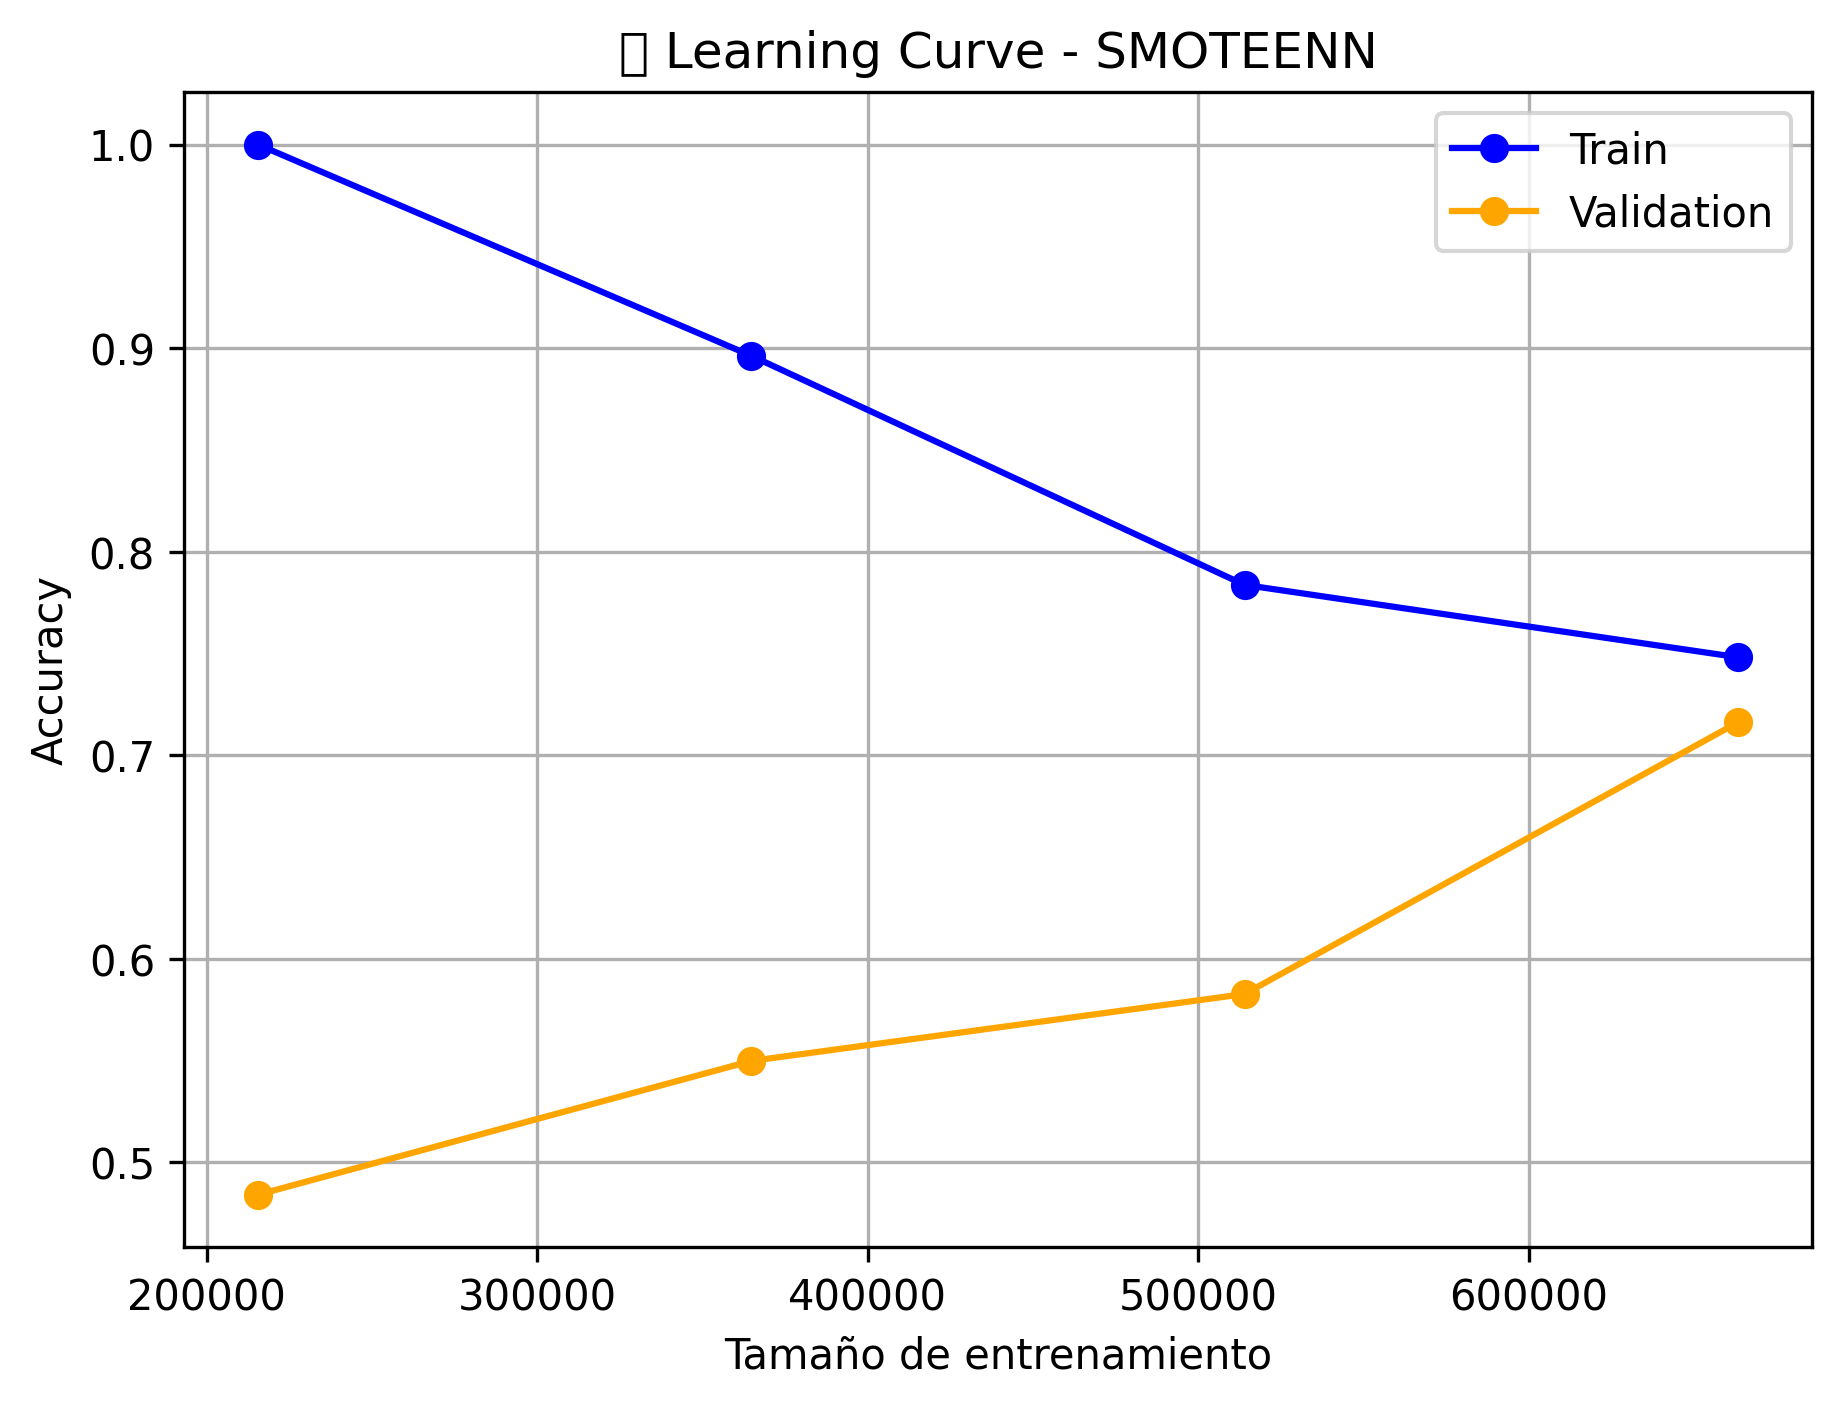

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


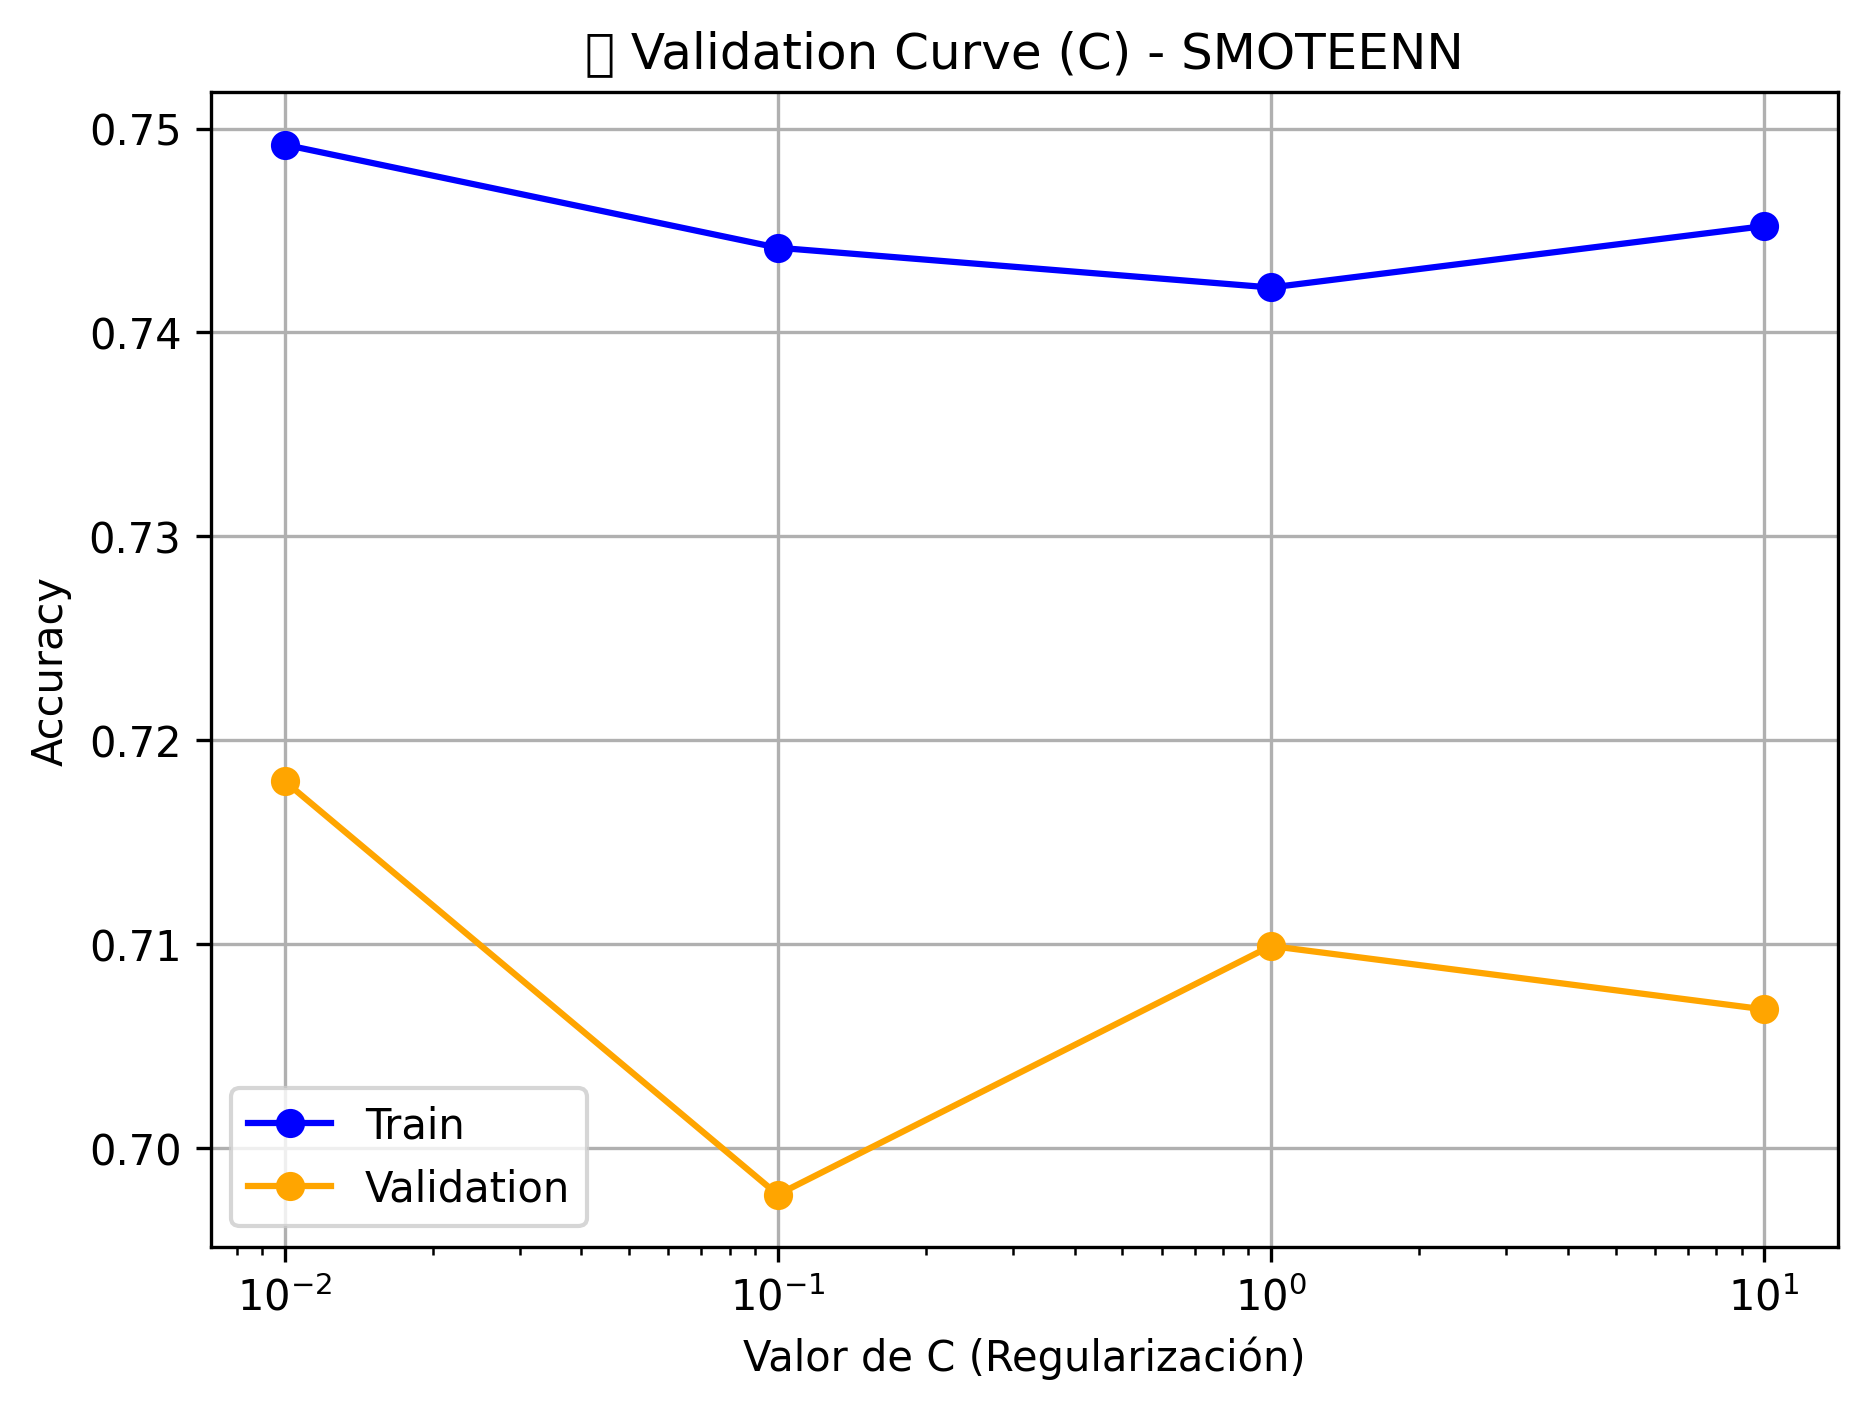

In [3]:
# ==========================================================
# 1.2 Tracking con Scikit-learn (learning_curve & validation_curve)
# ==========================================================

from sklearn.model_selection import learning_curve, validation_curve
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Función robusta para asegurar target
def ensure_target(df, name):
    if "target" not in df.columns:
        if "diabetes" in df.columns and "hypertension" in df.columns:
            df["target"] = df["diabetes"].astype(int) + df["hypertension"].astype(int) * 2
            mapping = {0: -1, 1: 0, 2: 1, 3: 2}
            df["target"] = df["target"].map(mapping)
            print(f"✅ {name}: target creado desde diabetes + hypertension")
        else:
            raise ValueError(f"❌ {name}: no tiene ni target ni diabetes/htn")
    return df

def sklearn_tracking(df, name):
    df = ensure_target(df.copy(), name)

    print(f"\n📂 Tracking scikit-learn para {name}")

    X = df.select_dtypes(include=["number"]).drop(columns=["target"], errors="ignore")
    y = df["target"]

    # Modelo simple
    model = LogisticRegression(max_iter=1000)

    # ========================
    # Learning Curve
    # ========================
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=3, scoring="accuracy",
        train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
    )

    plt.figure(figsize=(7,5), dpi=300)
    plt.plot(train_sizes, train_scores.mean(axis=1), "o-", color="blue", label="Train")
    plt.plot(train_sizes, val_scores.mean(axis=1), "o-", color="orange", label="Validation")
    plt.title(f"📈 Learning Curve - {name}")
    plt.xlabel("Tamaño de entrenamiento")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

    # ========================
    # Validation Curve
    # ========================
    param_range = [0.01, 0.1, 1, 10]
    train_scores, val_scores = validation_curve(
        model, X, y, param_name="C", param_range=param_range,
        cv=3, scoring="accuracy", n_jobs=-1
    )

    plt.figure(figsize=(7,5), dpi=300)
    plt.semilogx(param_range, train_scores.mean(axis=1), "o-", color="blue", label="Train")
    plt.semilogx(param_range, val_scores.mean(axis=1), "o-", color="orange", label="Validation")
    plt.title(f"📊 Validation Curve (C) - {name}")
    plt.xlabel("Valor de C (Regularización)")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejecutar
sklearn_tracking(df_original, "Original")
sklearn_tracking(df_sintetico, "Sintético")
sklearn_tracking(df_smoteenn, "SMOTEENN")


In [ ]:
#1.2 b  TensorFlow/Keras: Implementar callbacks personalizados

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Dataset reducido para Keras (ejemplo: solo features numéricas normalizadas)
X = df_sintetico.select_dtypes(include=["number"]).drop(columns=["target"]).values
y = keras.utils.to_categorical(df_sintetico["target"].values)

# Modelo simple
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(y.shape[1], activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Callback personalizado para tracking
class MetricsLogger(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"📊 Epoch {epoch+1} - loss={logs['loss']:.4f}, acc={logs['accuracy']:.4f}, val_acc={logs['val_accuracy']:.4f}")

history = model.fit(
    X, y,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    callbacks=[MetricsLogger()],
    verbose=0
)


📊 Epoch 1 - loss=58.0690, acc=0.8001, val_acc=0.8851
📊 Epoch 2 - loss=26.5594, acc=0.8274, val_acc=0.8813
📊 Epoch 3 - loss=15.3271, acc=0.8442, val_acc=0.8710
📊 Epoch 4 - loss=8.3136, acc=0.8540, val_acc=0.8866
📊 Epoch 5 - loss=4.8008, acc=0.8630, val_acc=0.8913


In [ ]:
#1.2 c PyTorch: Loops de entrenamiento con logging manual 

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder

# =========================
# 1. Preparar los targets
# =========================
le = LabelEncoder()
y_encoded = le.fit_transform(df_sintetico["target"])  
# Esto convierte [-1,0,1,2] → [0,1,2,3]

X = torch.tensor(
    df_sintetico.select_dtypes(include=["number"]).drop(columns=["target"]).values,
    dtype=torch.float32
)
y = torch.tensor(y_encoded, dtype=torch.long)

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=64, shuffle=True)

# =========================
# 2. Definir modelo
# =========================
class Net(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

model = Net(X.shape[1], num_classes=len(le.classes_))  # 4 clases
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# =========================
# 3. Training loop
# =========================
for epoch in range(5):
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    print(f"📊 Epoch {epoch+1} - Loss: {running_loss/len(loader):.4f}, Accuracy: {100*correct/total:.2f}%")

# =========================
# 4. Volver a tus etiquetas originales
# =========================
sample_outputs = model(X[:10])
_, preds = sample_outputs.max(1)
decoded_preds = le.inverse_transform(preds.numpy())  # vuelve a [-1,0,1,2]
print("Ejemplo de predicciones en formato original:", decoded_preds)



📊 Epoch 1 - Loss: 22.4674, Accuracy: 75.74%
📊 Epoch 2 - Loss: 2.9277, Accuracy: 82.57%
📊 Epoch 3 - Loss: 0.5352, Accuracy: 86.23%
📊 Epoch 4 - Loss: 0.5481, Accuracy: 86.14%
📊 Epoch 5 - Loss: 0.5520, Accuracy: 86.09%
Ejemplo de predicciones en formato original: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]



📂 Original cargado. Shape: (100000, 9)
✅ Original: 'target' creado desde diabetes + hypertension.

📂 Sintético cargado. Shape: (300000, 13)

📂 SMOTEENN cargado. Shape: (994916, 24)


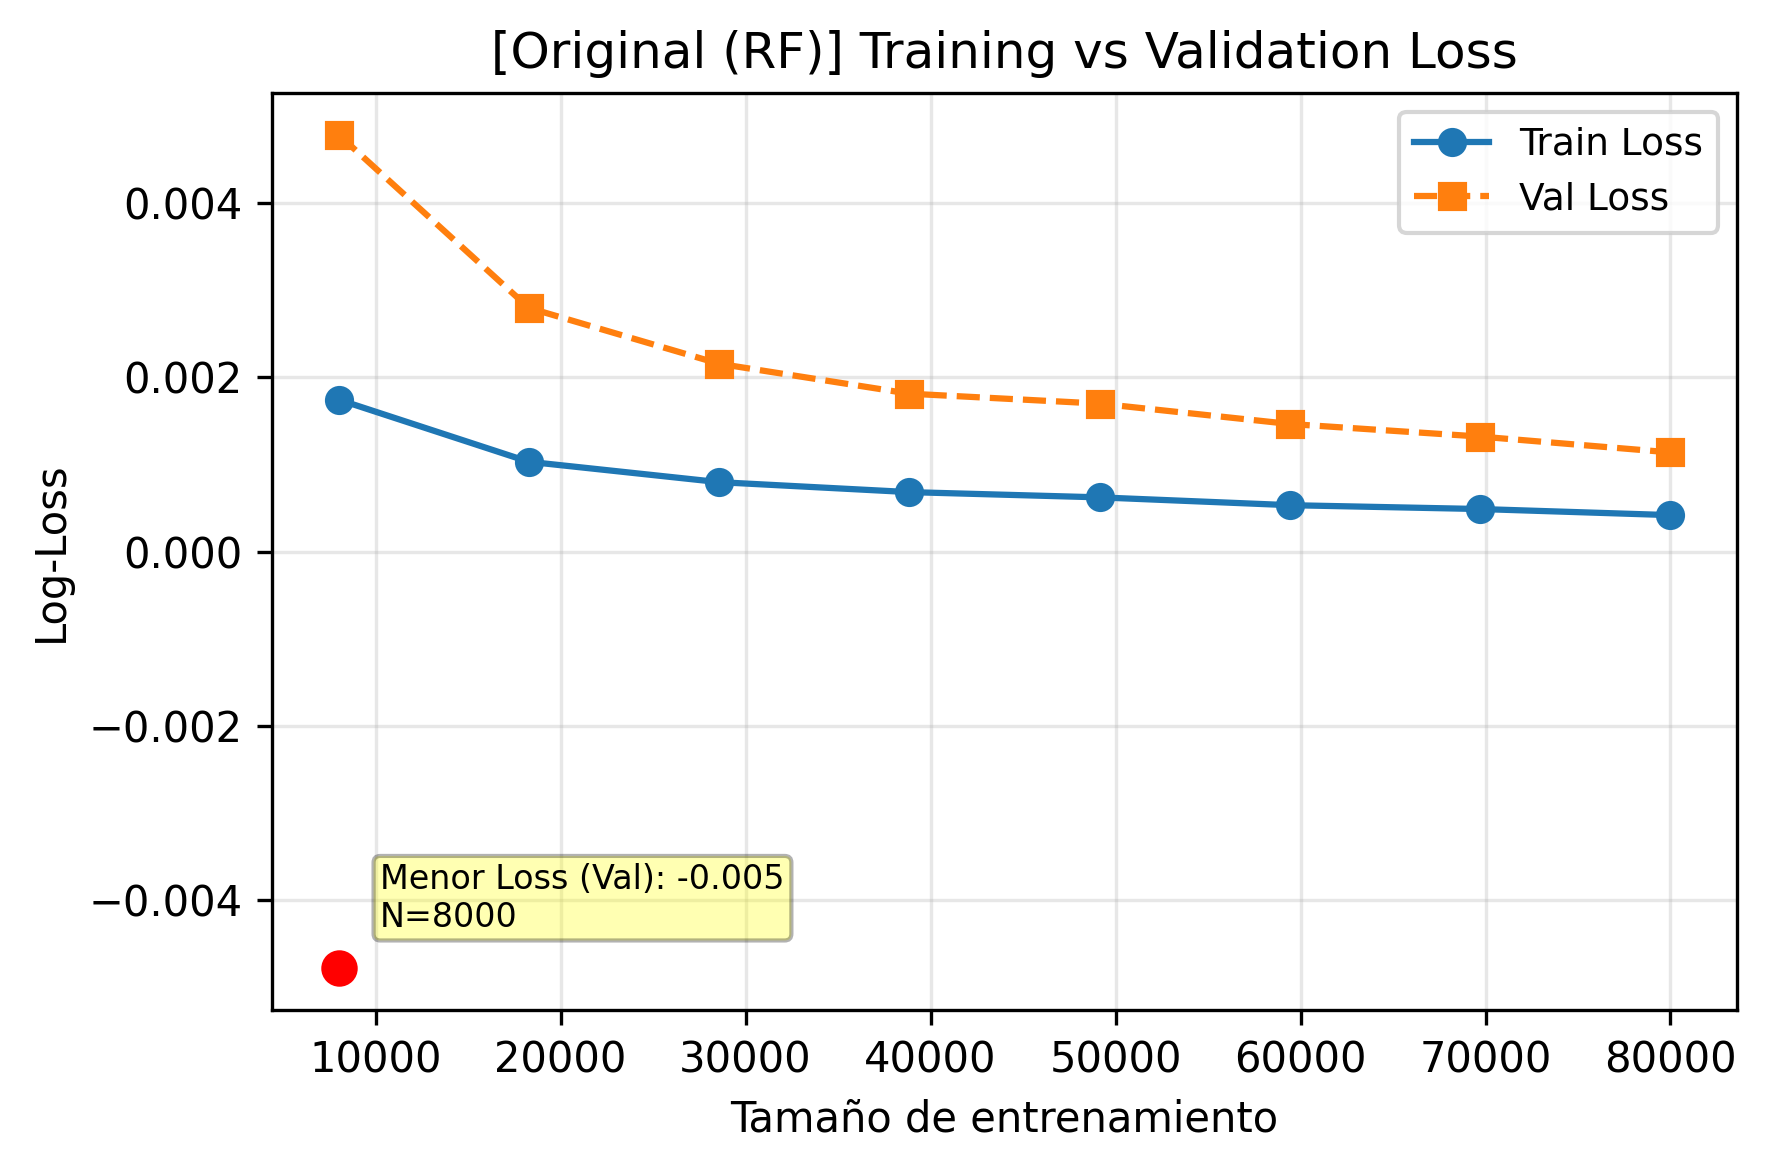

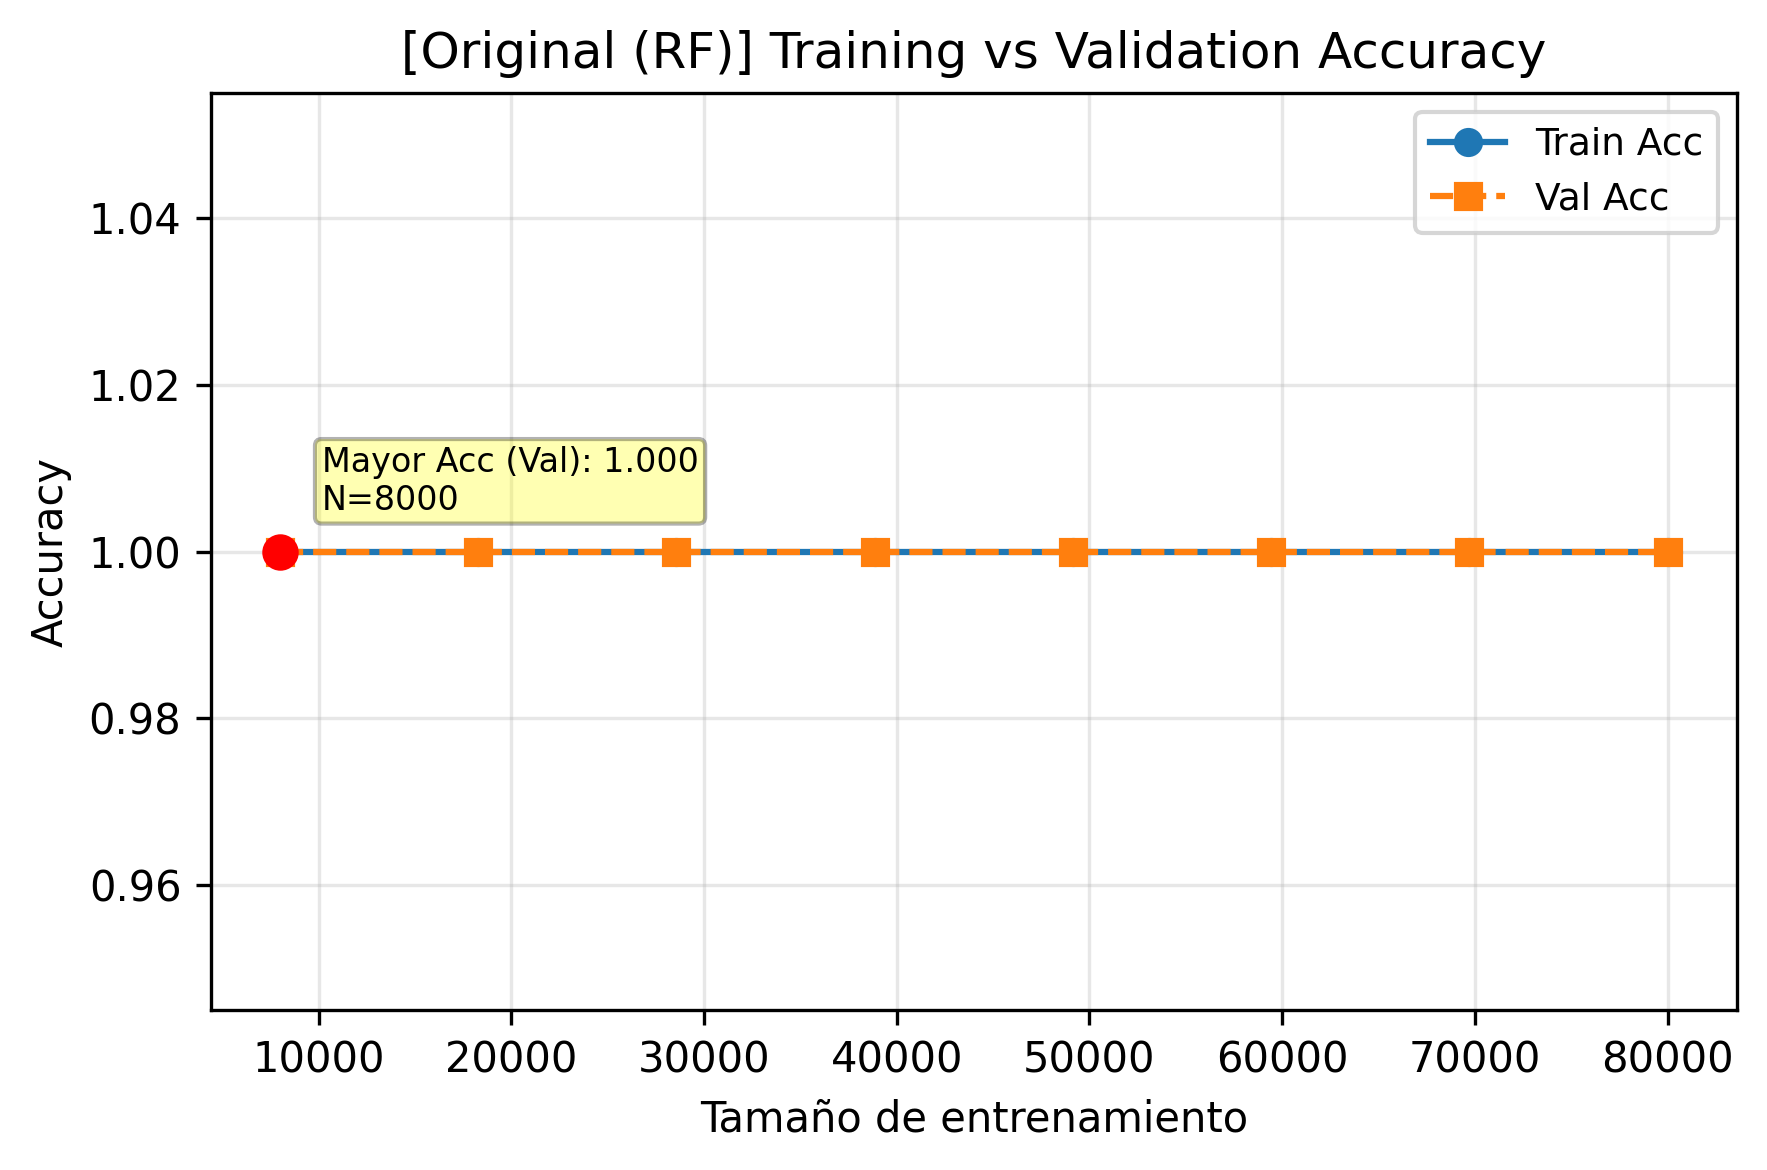

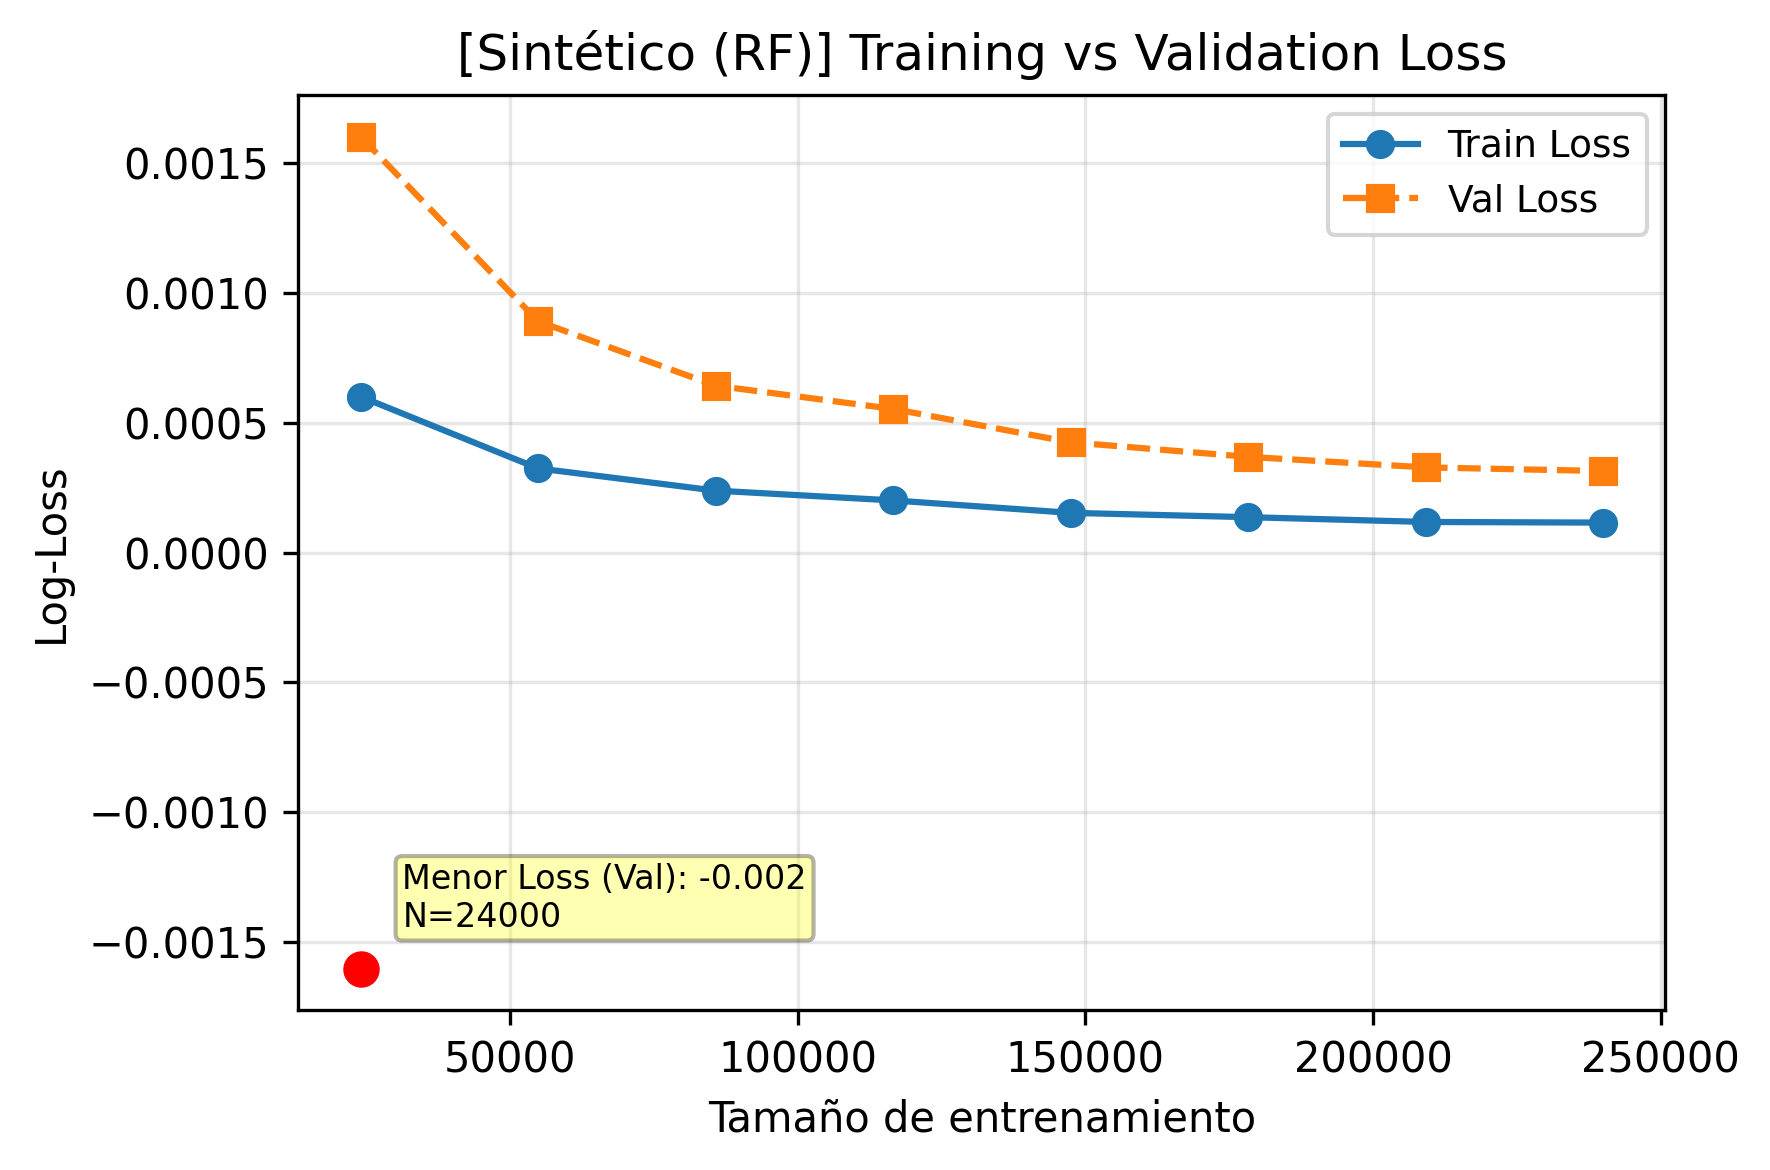

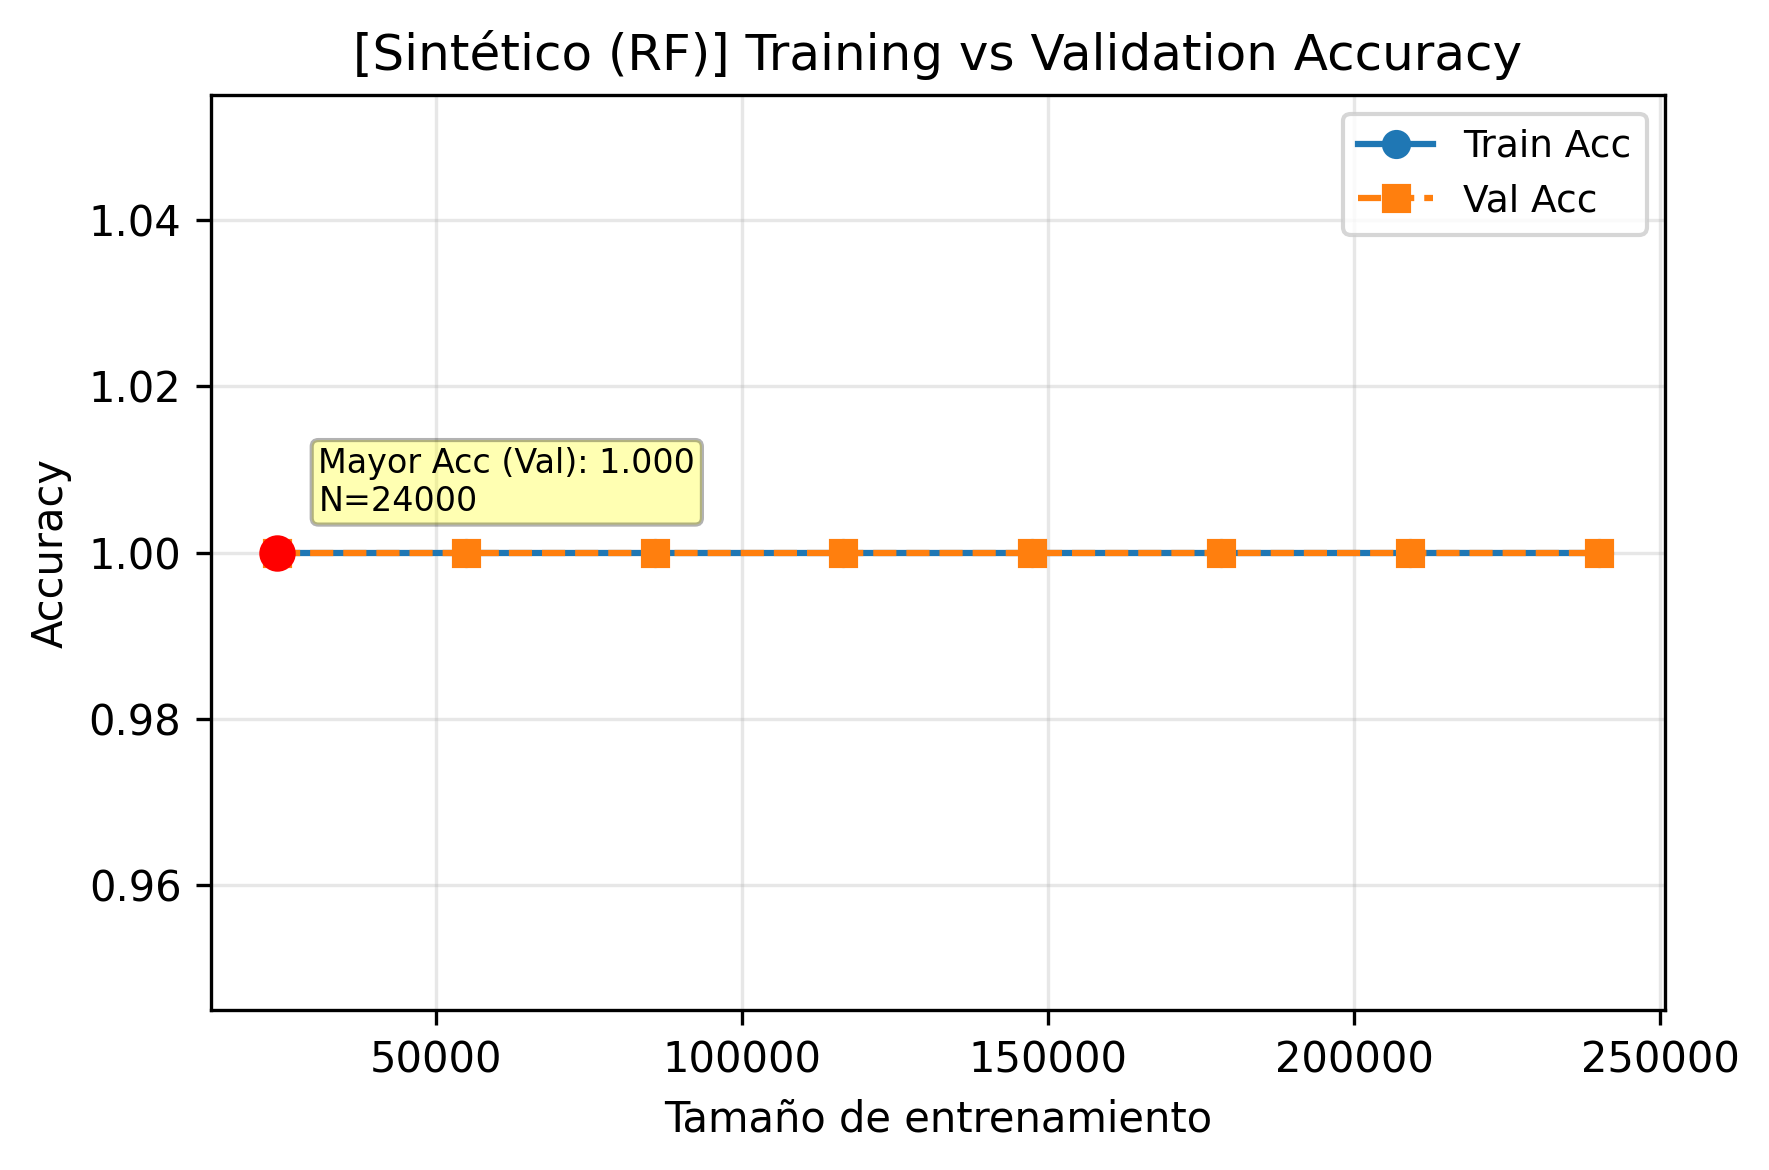

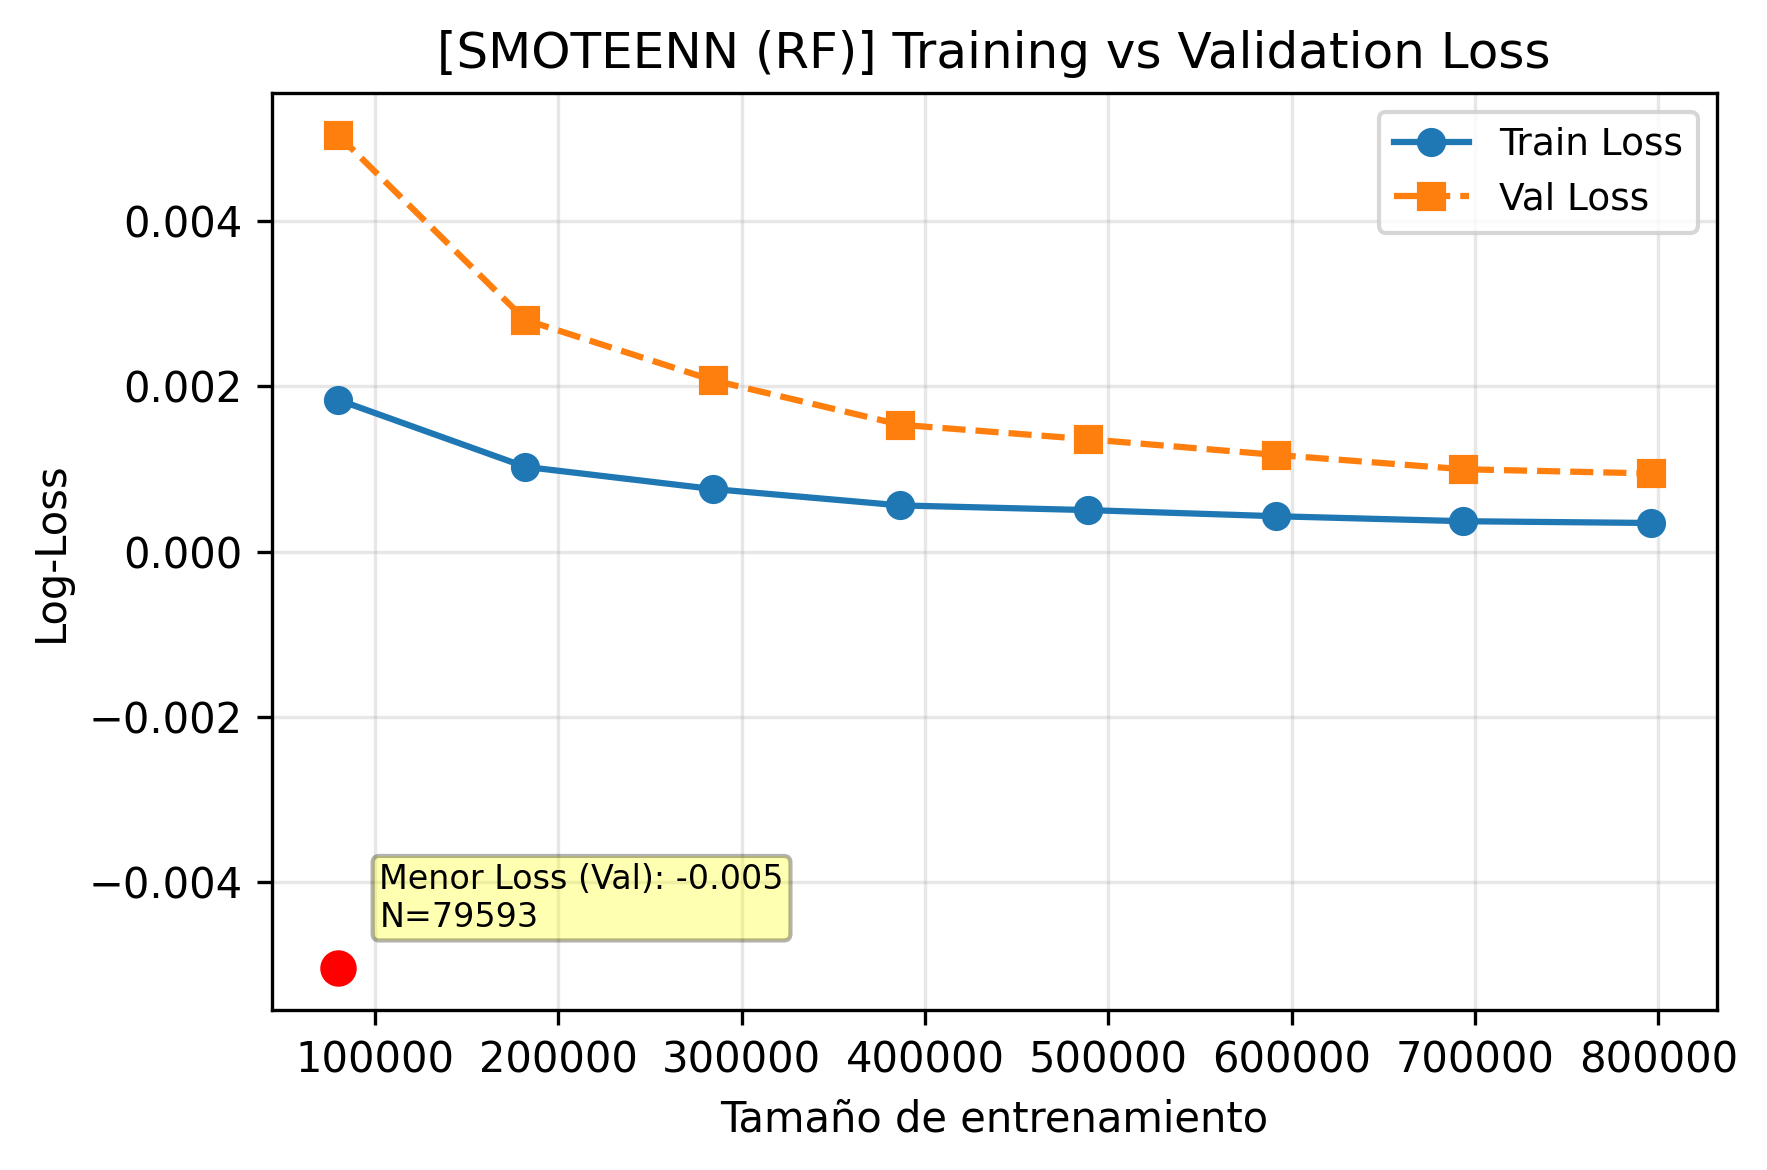

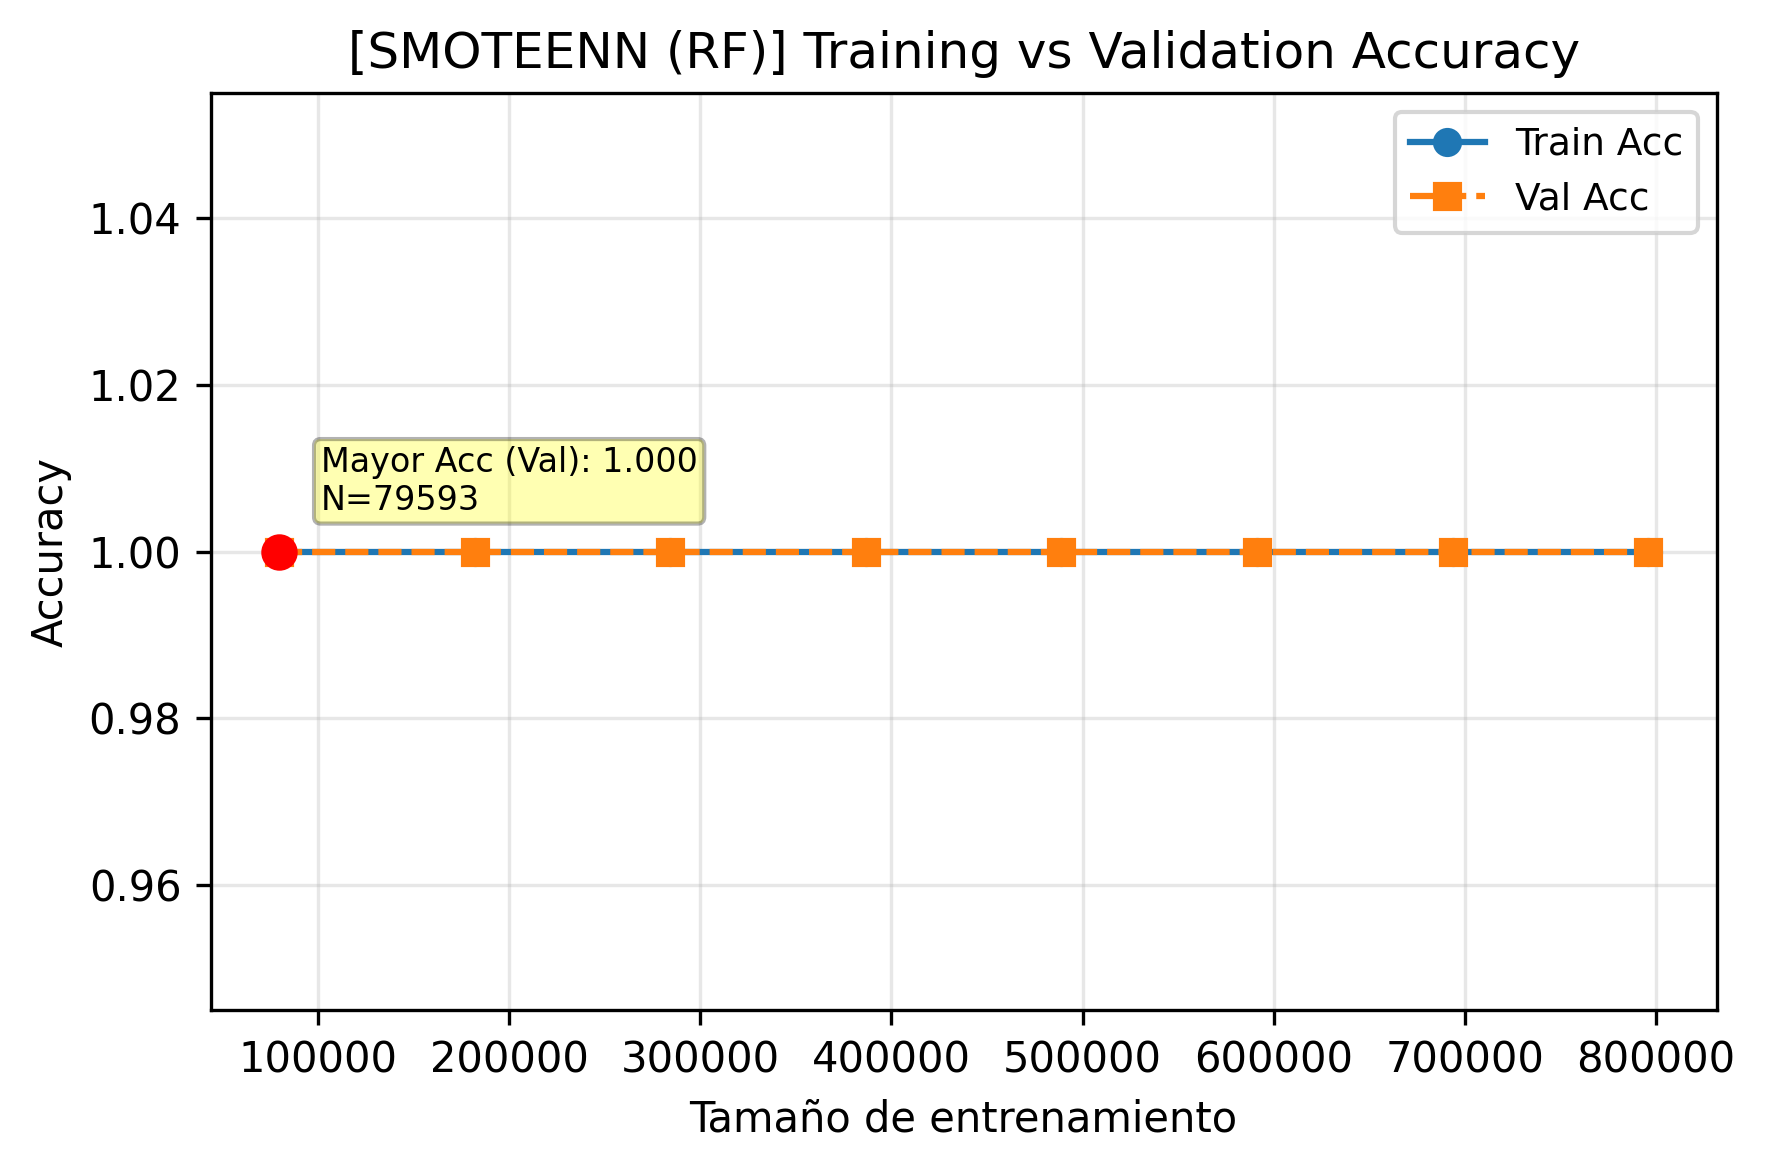

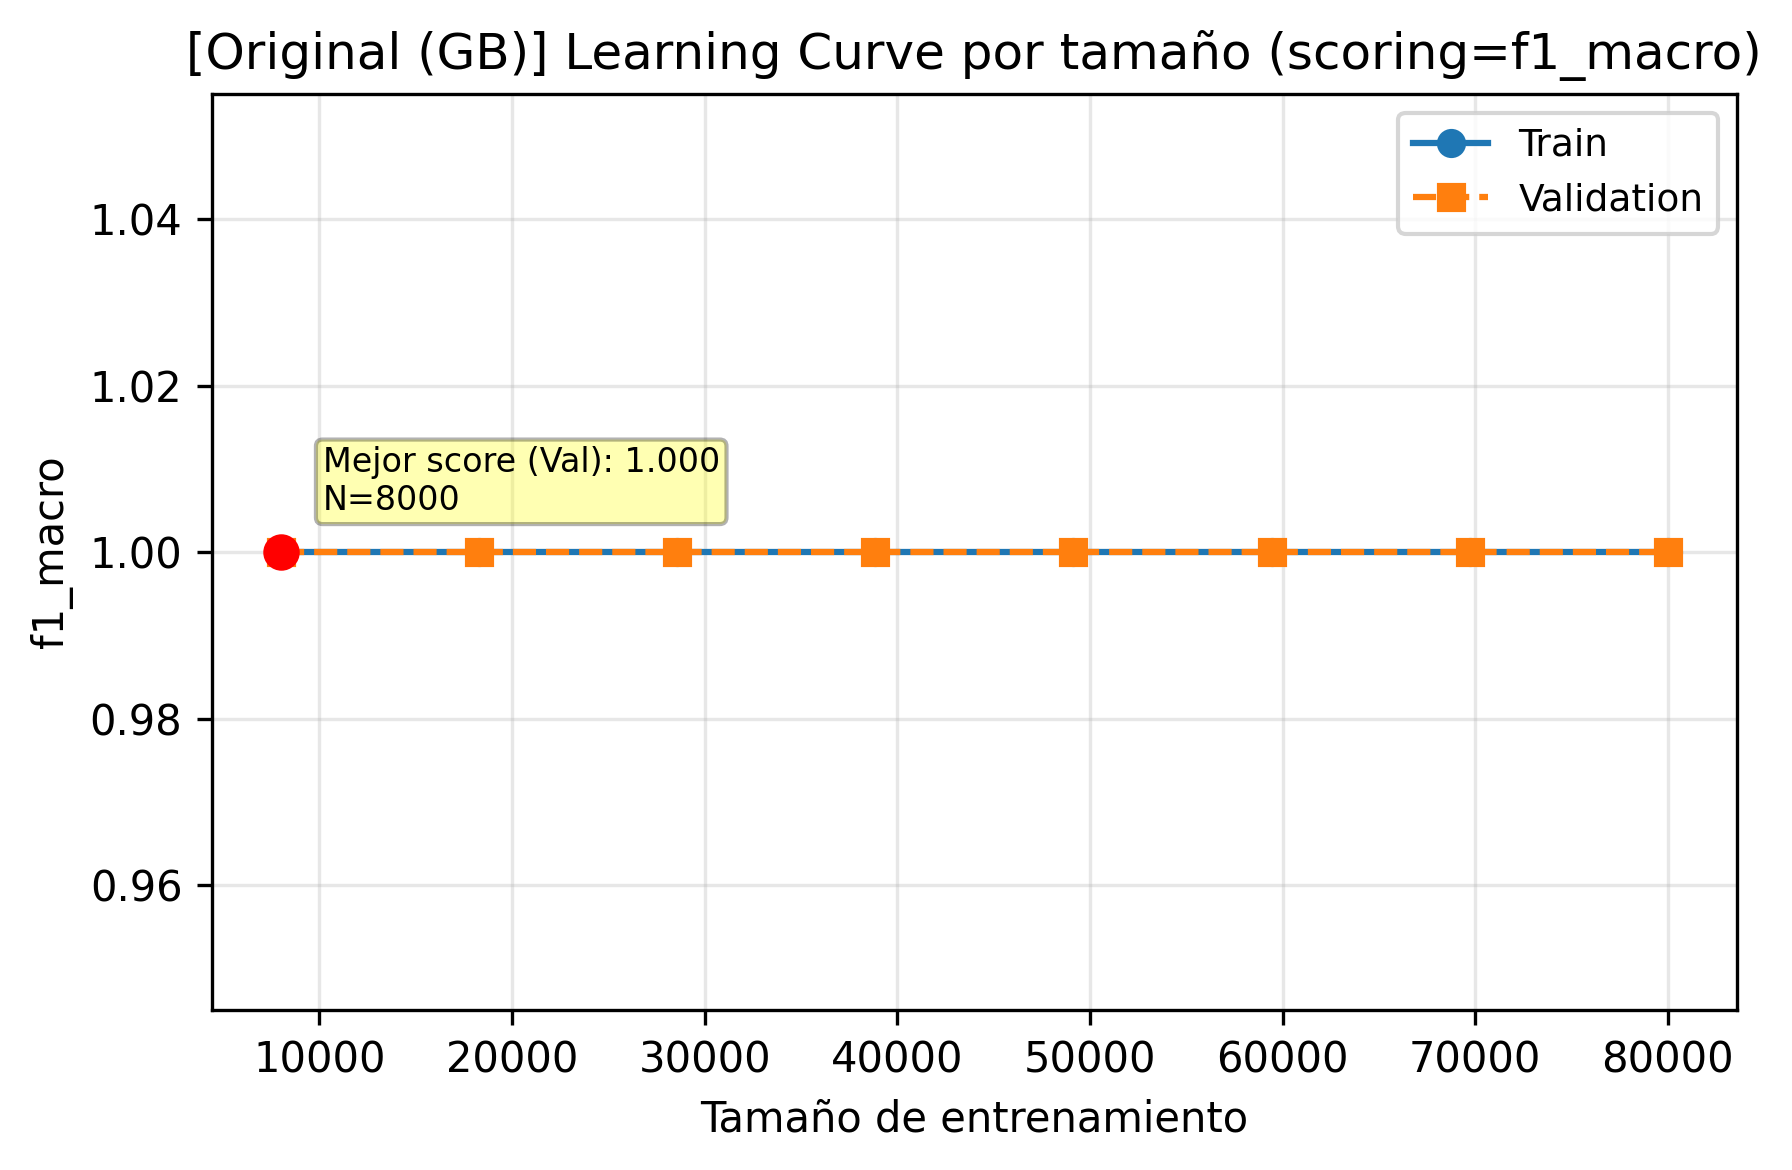

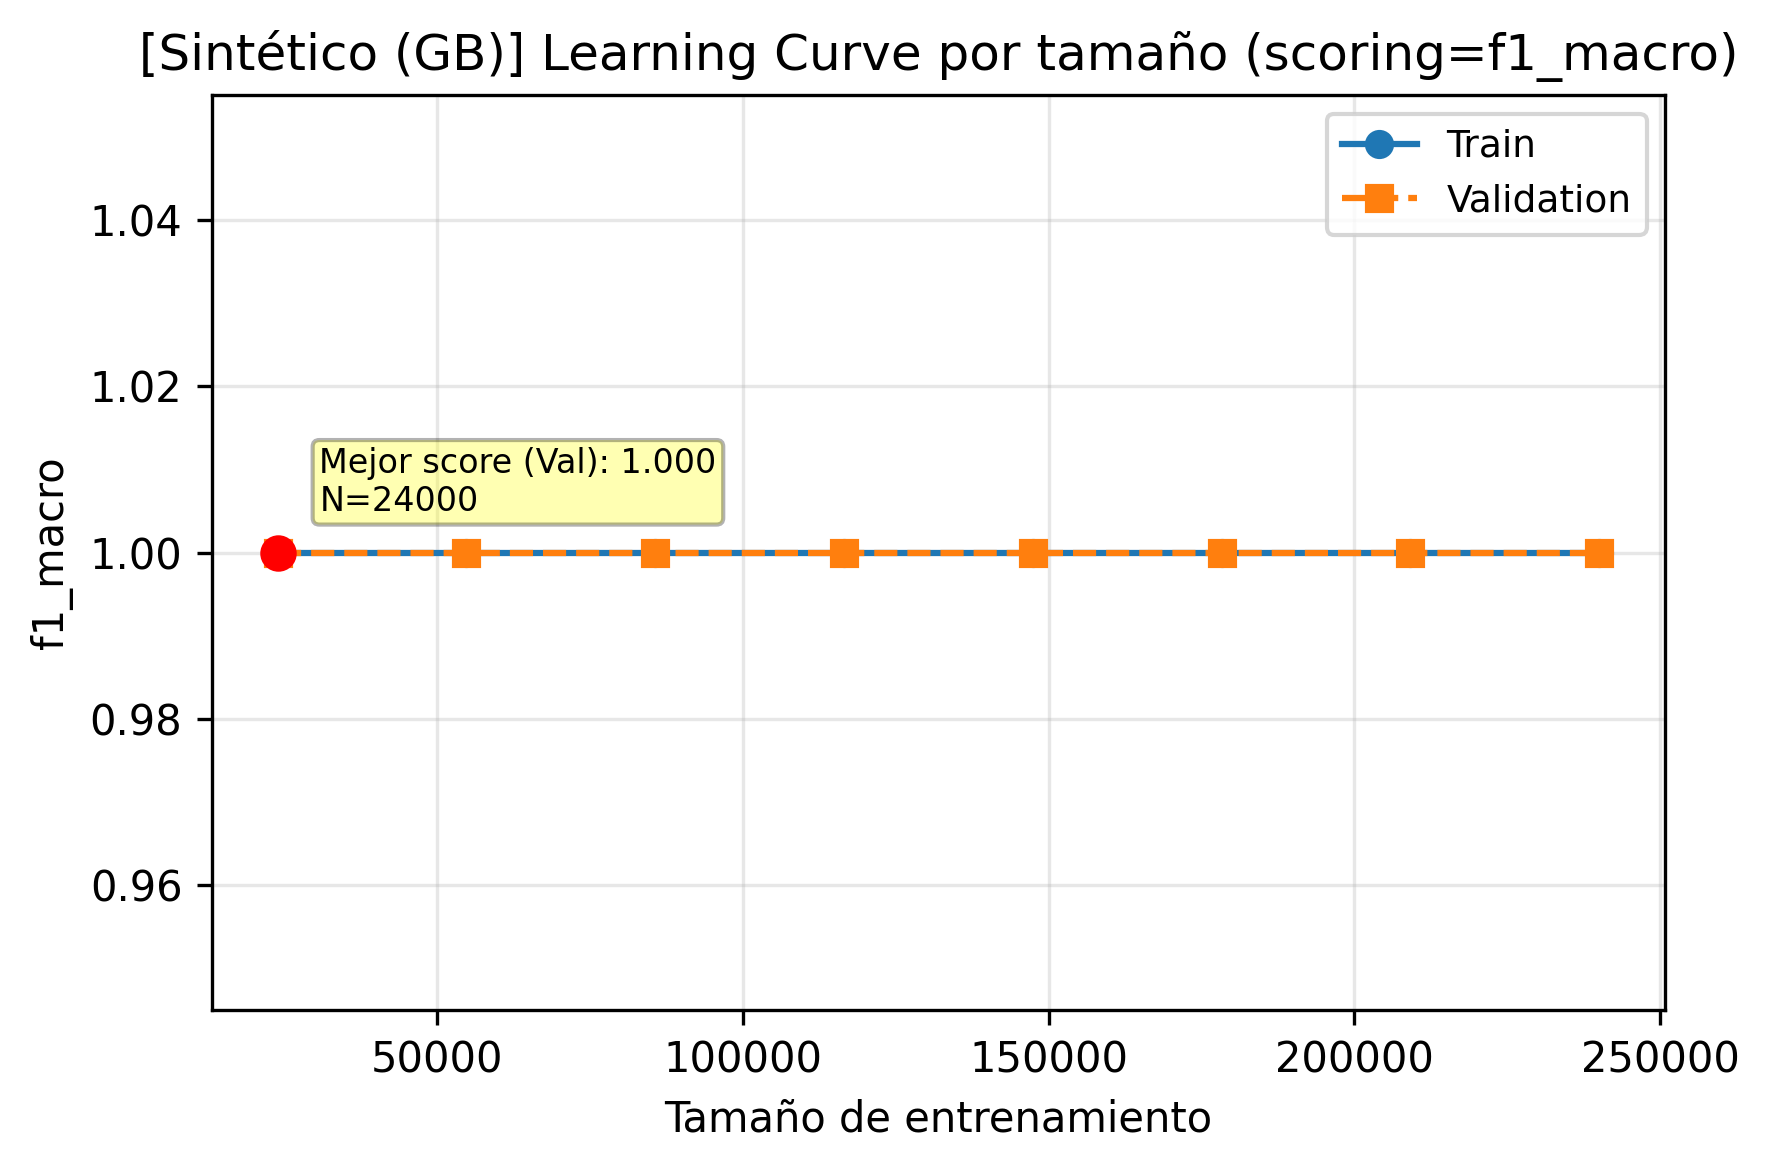

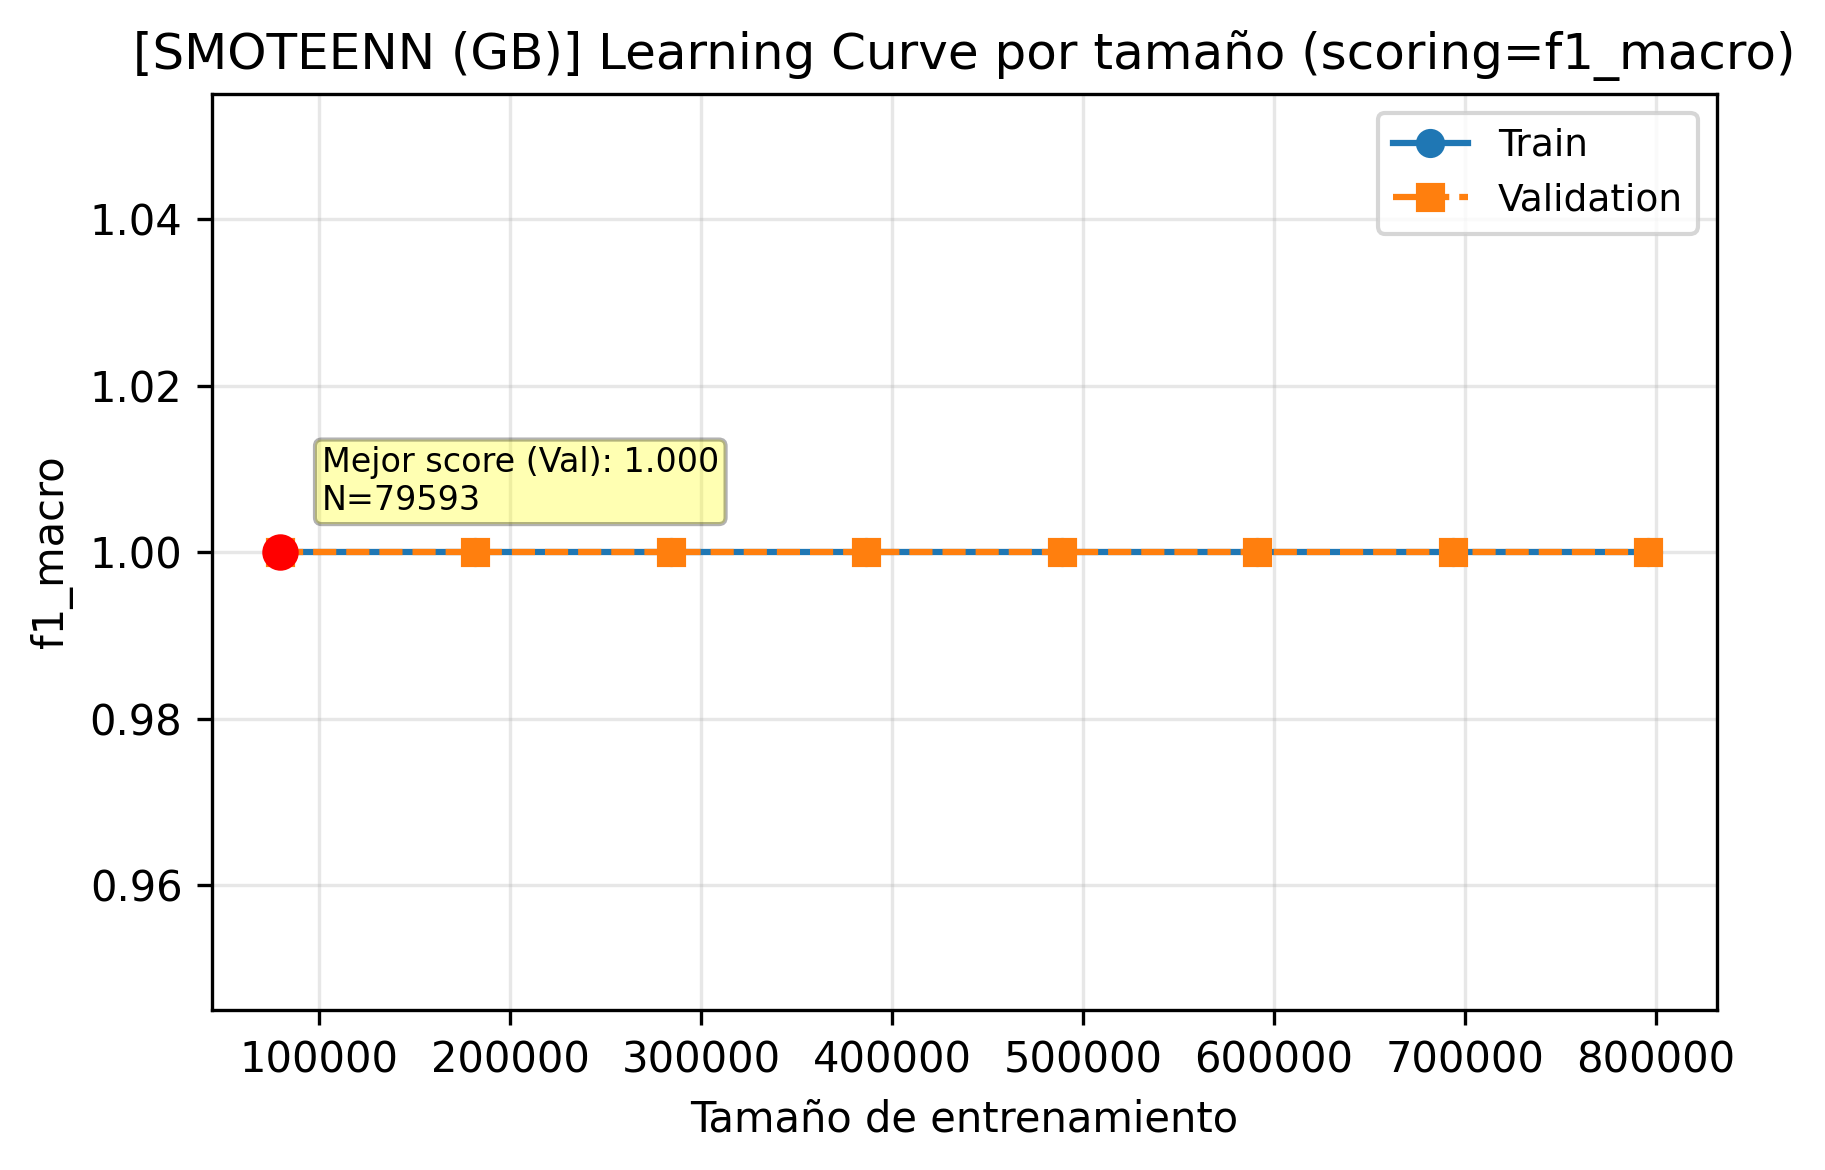

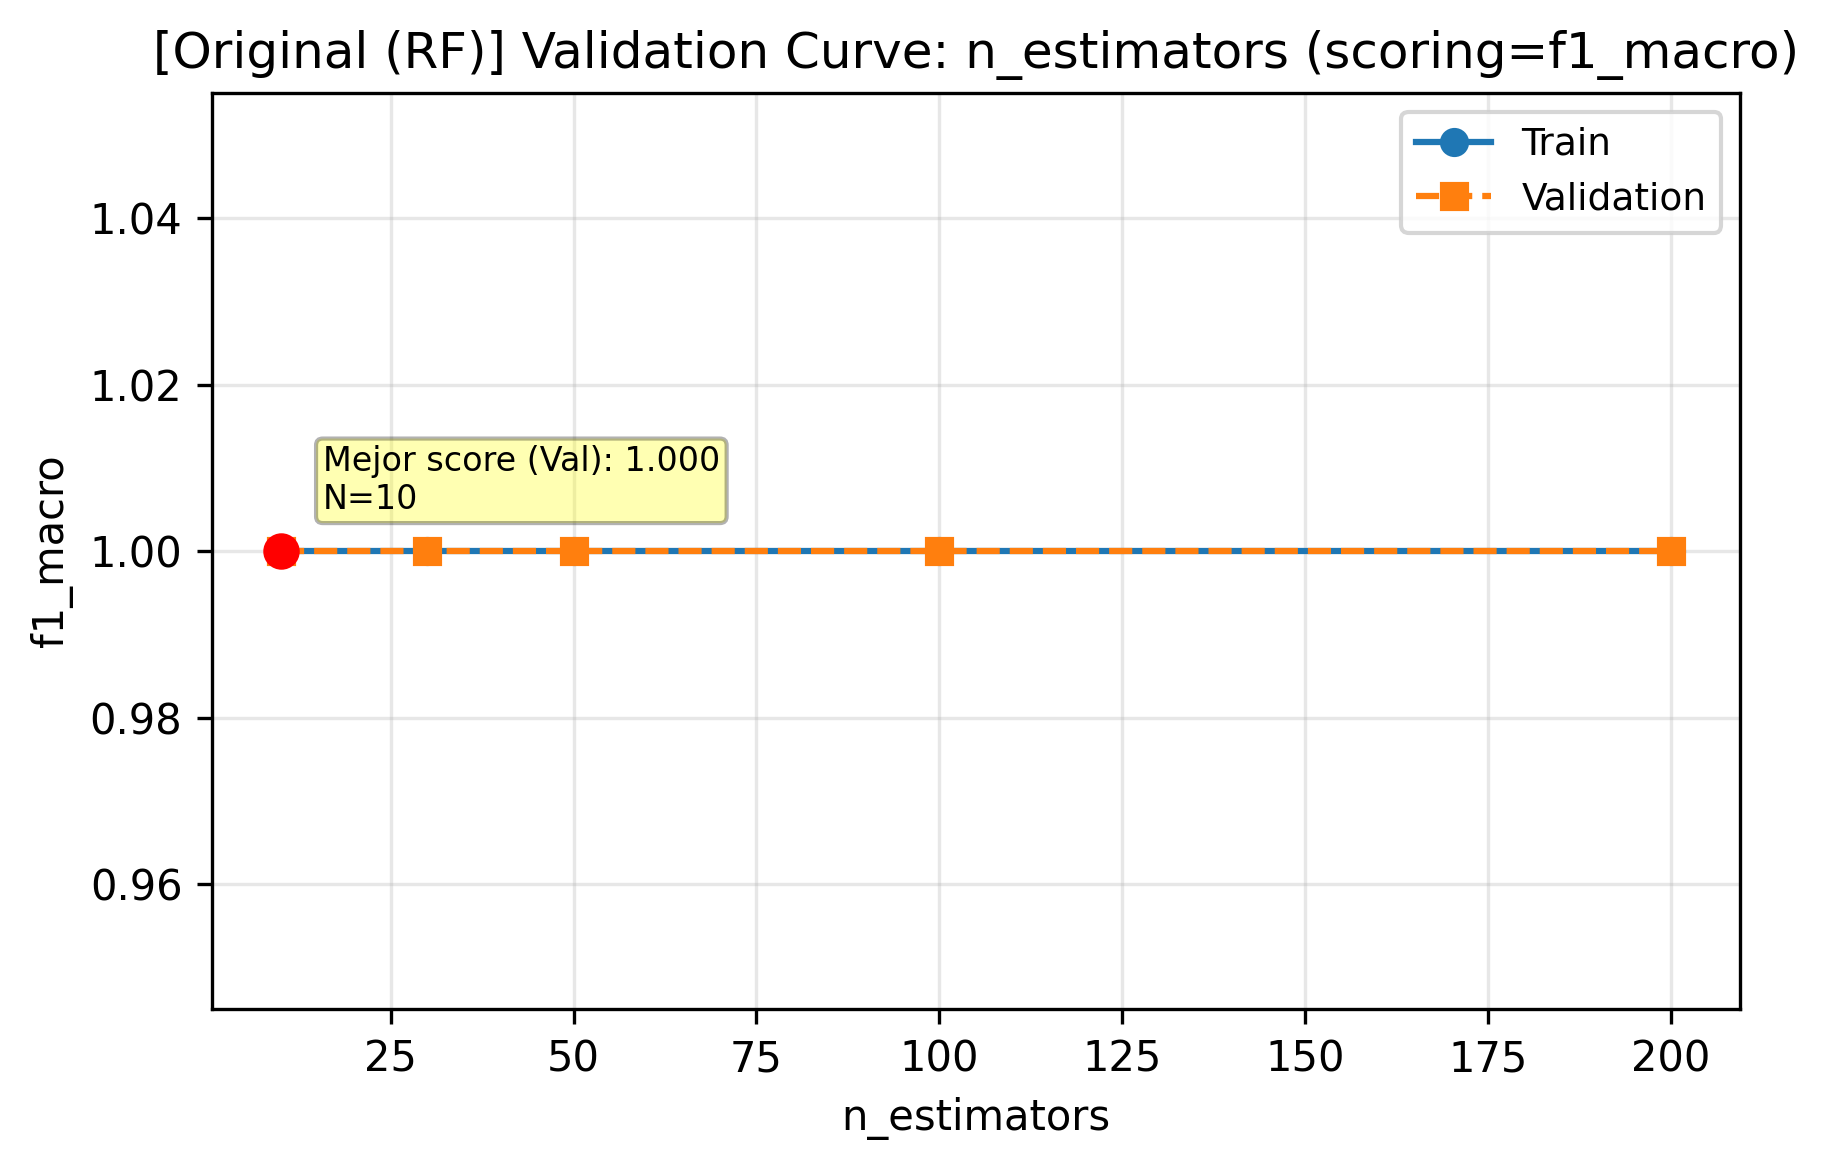

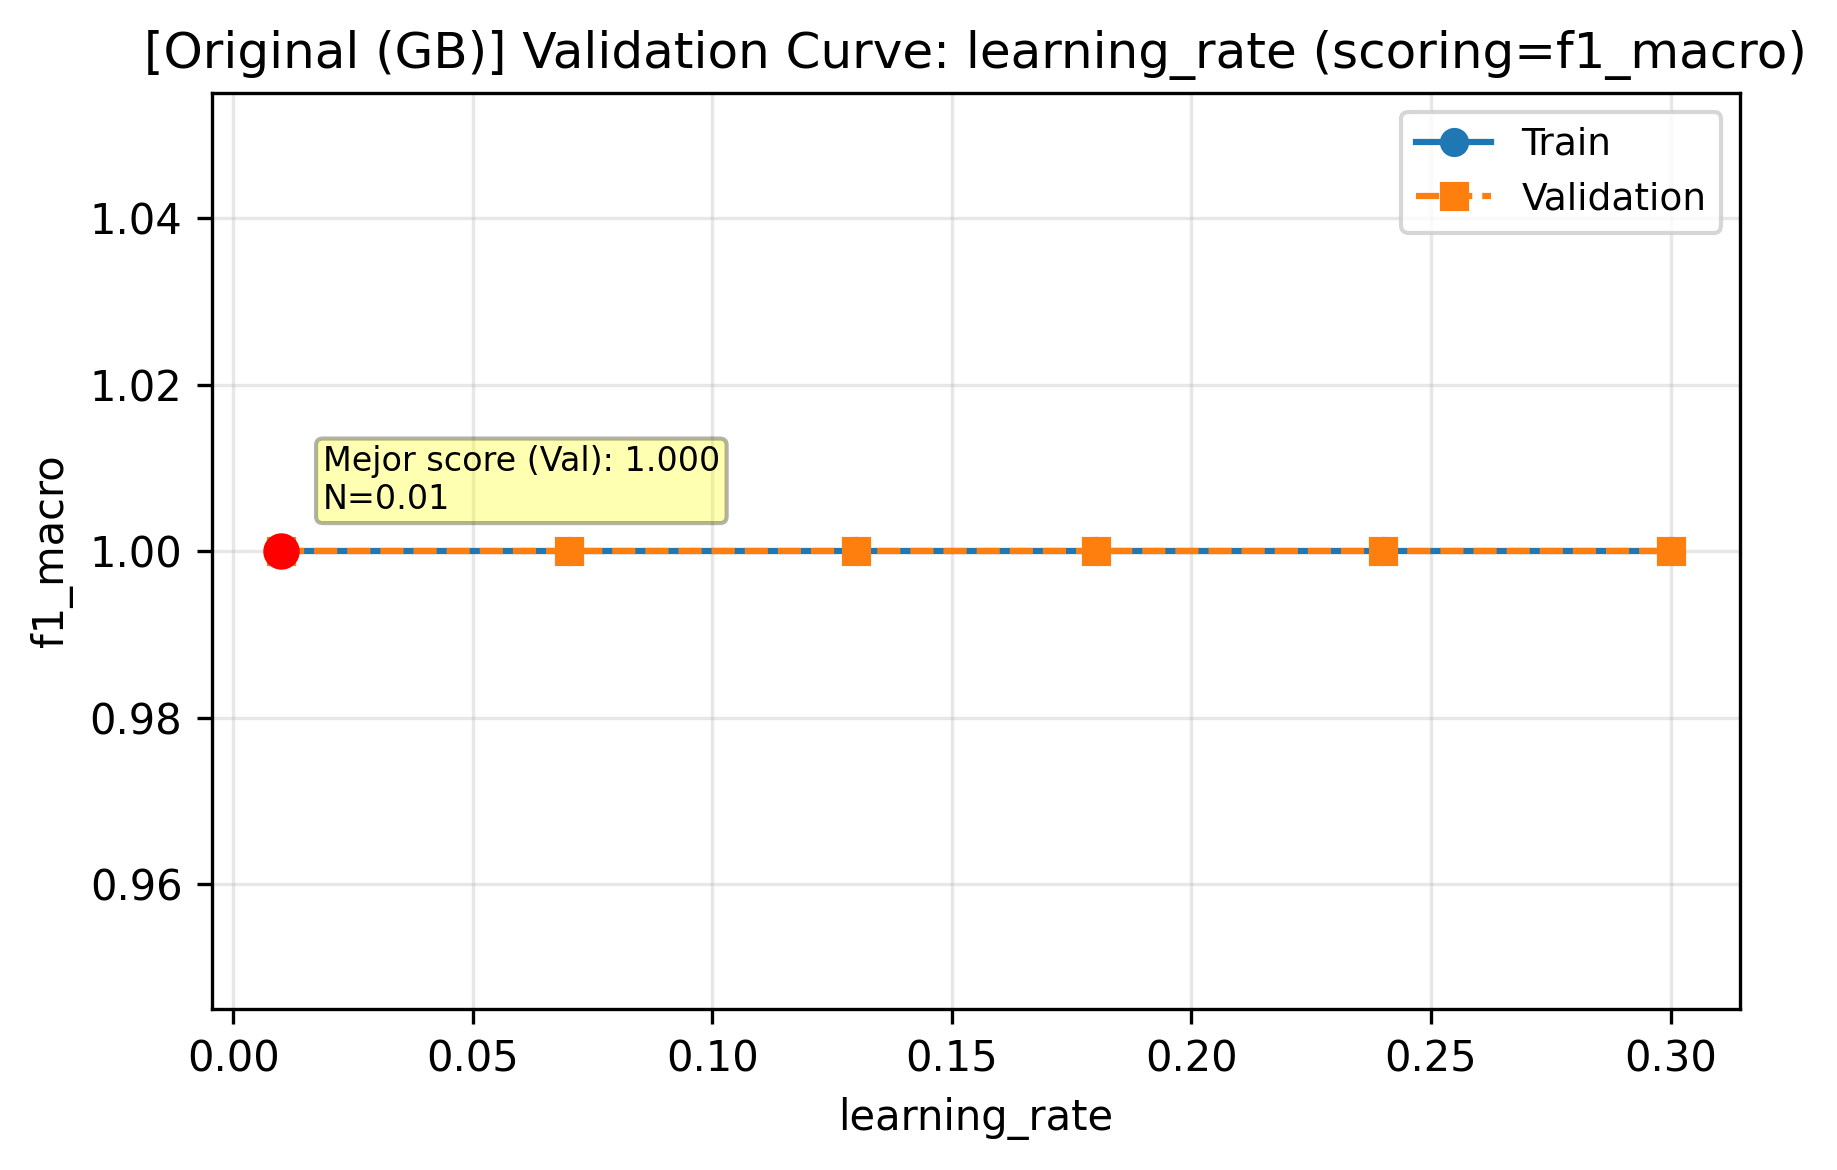

In [ ]:
# ==========================================================
# CURVAS DE APRENDIZAJE Y VALIDACIÓN — CLÍNICA (Diabetes/HTA)
# ==========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, learning_curve, validation_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer, log_loss, accuracy_score

# ---------------------------
# 0) Utilidades de carga/limpieza
# ---------------------------
def load_dataset(path, name="Dataset"):
    df = pd.read_csv(path)
    print(f"\n📂 {name} cargado. Shape: {df.shape}")

    # Crear target si no existe (mapeo: -1=ninguna, 0=diabetes, 1=HTA, 2=ambas)
    if "target" not in df.columns:
        if {"diabetes","hypertension"}.issubset(df.columns):
            tmp = df["diabetes"].astype(int) + 2*df["hypertension"].astype(int)
            df["target"] = tmp.map({0:-1, 1:0, 2:1, 3:2})
            print(f"✅ {name}: 'target' creado desde diabetes + hypertension.")
        else:
            raise ValueError(f"{name}: no tiene 'target' ni ('diabetes','hypertension').")

    # Seleccionar solo columnas numéricas para el modelo base
    num = df.select_dtypes(include=["number"]).copy()

    # Imputar NaN (mediana)
    num = num.fillna(num.median(numeric_only=True))

    # Separar X, y
    X = num.drop(columns=["target"])
    y = num["target"].round().astype(int)

    # Estandarización (opcional pero recomendable)
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    return X_scaled, y

# ---------------------------
# 1) Gráficos helper
# ---------------------------
def _style_plot(title, xlabel, ylabel):
    plt.title(title, fontsize=12)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=9)
    plt.tight_layout()

def _annotate_best(x, y, label="Mejor"):
    idx = np.nanargmax(y) if "Acc" in label or "score" in label else np.nanargmin(y)
    plt.scatter([x[idx]], [y[idx]], s=60, color="red", zorder=5)
    plt.annotate(f"{label}: {y[idx]:.3f}\nN={x[idx]}", 
                 (x[idx], y[idx]), xytext=(10,10), textcoords="offset points",
                 fontsize=8, bbox=dict(boxstyle="round,pad=0.2", fc="yellow", alpha=0.3))

# ---------------------------
# 2) A/B: Training vs Validation Loss y Accuracy
#    (usando learning_curve con dos scorings)
# ---------------------------
def plot_train_val_loss_acc(estimator, X, y, name="Dataset", cv_splits=5):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

    # A: Loss (log-loss) -> en sklearn va como "neg_log_loss", luego invertimos signo
    train_sizes, train_scores_ll, valid_scores_ll = learning_curve(
        estimator, X, y, cv=cv, scoring="neg_log_loss", 
        train_sizes=np.linspace(0.1, 1.0, 8), n_jobs=-1, shuffle=True, random_state=42
    )
    train_loss = -np.mean(train_scores_ll, axis=1)
    valid_loss = -np.mean(valid_scores_ll, axis=1)

    plt.figure(dpi=300, figsize=(6,4))
    plt.plot(train_sizes, train_loss, "o-", label="Train Loss", color="tab:blue")
    plt.plot(train_sizes, valid_loss, "s--", label="Val Loss", color="tab:orange")
    _annotate_best(train_sizes, -valid_loss, label="Menor Loss (Val)")  # anotamos el mínimo de loss
    _style_plot(f"[{name}] Training vs Validation Loss", "Tamaño de entrenamiento", "Log-Loss")

    # B: Accuracy
    train_sizes, train_scores_acc, valid_scores_acc = learning_curve(
        estimator, X, y, cv=cv, scoring="accuracy",
        train_sizes=np.linspace(0.1, 1.0, 8), n_jobs=-1, shuffle=True, random_state=42
    )
    train_acc = np.mean(train_scores_acc, axis=1)
    valid_acc = np.mean(valid_scores_acc, axis=1)

    plt.figure(dpi=300, figsize=(6,4))
    plt.plot(train_sizes, train_acc, "o-", label="Train Acc", color="tab:blue")
    plt.plot(train_sizes, valid_acc, "s--", label="Val Acc", color="tab:orange")
    _annotate_best(train_sizes, valid_acc, label="Mayor Acc (Val)")
    _style_plot(f"[{name}] Training vs Validation Accuracy", "Tamaño de entrenamiento", "Accuracy")

# ---------------------------
# 3) C: Learning Curves por tamaño de dataset
#    (ya lo tenemos arriba; hacemos un wrapper por si se quiere otro scoring)
# ---------------------------
def plot_learning_curves_by_size(estimator, X, y, name="Dataset", scoring="f1_macro", cv_splits=5):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

    train_sizes, train_scores, valid_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 8), n_jobs=-1, shuffle=True, random_state=42
    )
    train_mean = np.mean(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)

    plt.figure(dpi=300, figsize=(6,4))
    plt.plot(train_sizes, train_mean, "o-", label="Train", color="tab:blue")
    plt.plot(train_sizes, valid_mean, "s--", label="Validation", color="tab:orange")
    _annotate_best(train_sizes, valid_mean, label="Mejor score (Val)")
    _style_plot(f"[{name}] Learning Curve por tamaño (scoring={scoring})",
                "Tamaño de entrenamiento", scoring)

# ---------------------------
# 4) D: Validation Curves por hiperparámetros
#    RF: n_estimators;  GB: learning_rate
# ---------------------------
def plot_validation_curve_param(estimator, X, y, param_name, param_range, scoring, name):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    train_scores, valid_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        scoring=scoring, cv=cv, n_jobs=-1
    )
    train_mean = np.mean(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)

    plt.figure(dpi=300, figsize=(6,4))
    plt.plot(param_range, train_mean, "o-", label="Train", color="tab:blue")
    plt.plot(param_range, valid_mean, "s--", label="Validation", color="tab:orange")
    _annotate_best(param_range, valid_mean, label="Mejor score (Val)")
    _style_plot(f"[{name}] Validation Curve: {param_name} (scoring={scoring})",
                param_name, scoring)

# =========================
# EJEMPLO DE USO (3 datasets)
# =========================
# 1) Cargar datasets (ajusta rutas si están en otra carpeta)
X_o, y_o = load_dataset("diabetes_prediction_dataset.csv", "Original")
X_s, y_s = load_dataset("dataset_timeseries_realista_con_target.csv", "Sintético")
X_b, y_b = load_dataset("dataset_balanceado_SMOTEENN.csv", "SMOTEENN")

# 2) Definir modelos base
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# 3) A/B: Loss & Accuracy (ejemplo con RF)
plot_train_val_loss_acc(rf, X_o, y_o, name="Original (RF)")
plot_train_val_loss_acc(rf, X_s, y_s, name="Sintético (RF)")
plot_train_val_loss_acc(rf, X_b, y_b, name="SMOTEENN (RF)")

# 4) C: Learning curve por tamaño de dataset (ej. F1 macro) con GB
plot_learning_curves_by_size(gb, X_o, y_o, name="Original (GB)", scoring="f1_macro")
plot_learning_curves_by_size(gb, X_s, y_s, name="Sintético (GB)", scoring="f1_macro")
plot_learning_curves_by_size(gb, X_b, y_b, name="SMOTEENN (GB)", scoring="f1_macro")

# 5) D: Validation curves por hiperparámetro
#    RandomForest: n_estimators
plot_validation_curve_param(
    RandomForestClassifier(random_state=42), 
    X_o, y_o, 
    param_name="n_estimators", 
    param_range=[10, 30, 50, 100, 200],
    scoring="f1_macro",
    name="Original (RF)"
)
#    GradientBoosting: learning_rate
plot_validation_curve_param(
    GradientBoostingClassifier(random_state=42),
    X_o, y_o,
    param_name="learning_rate",
    param_range=np.round(np.linspace(0.01, 0.3, 6), 2),
    scoring="f1_macro",
    name="Original (GB)"
)


📌 3.1 Identificación de Patrones

Overfitting:

Si ves que el training loss sigue bajando mientras que el validation loss sube.

Accuracy en entrenamiento es casi 1.0, pero validation no mejora.

Gap (diferencia) entre train/val crece.

Underfitting:

Training y validation loss se quedan altos y casi iguales.

Training accuracy no llega a valores buenos (<0.8).

Modelo no aprende patrones.

Comportamiento Óptimo:

Train y validation loss bajan y convergen juntos.

Gap pequeño y estable.

Accuracy bueno tanto en train como en validation.

In [3]:
#3.2 
# ==========================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
import numpy as np

# =========================
# Función extendida con diagnóstico
# =========================
def analyze_dataset(df, name="Dataset"):
    # Detectar target
    if "target" in df.columns:
        y = df["target"].round().astype(int)
    elif "diabetes" in df.columns:  # dataset original
        y = df["diabetes"].round().astype(int)
    else:
        raise ValueError(f"No se encontró columna target en {name}")

    # Variables predictoras (numéricas)
    X = df.select_dtypes(include=["int64", "float64"]).drop(columns=["target", "diabetes"], errors="ignore")

    # División train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    print(f"\n📂 Analizando {name}")
    print(f"📊 Shape: {df.shape}")
    print(f"🔢 Distribución clases: {Counter(y)}")

    # Entrenamiento
    model = RandomForestClassifier(random_state=42, n_estimators=100)
    model.fit(X_train, y_train)

    # Predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Métricas
    report_test = classification_report(y_test, y_test_pred, output_dict=True)
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)

    # Índices adicionales
    gap_acc = acc_train - acc_test
    macro_recall = report_test["macro avg"]["recall"]
    macro_precision = report_test["macro avg"]["precision"]
    macro_f1 = report_test["macro avg"]["f1-score"]

    # Diagnóstico automático
    if gap_acc > 0.05:
        diagnosis = "⚠️ Overfitting"
    elif acc_train < 0.80 and acc_test < 0.80:
        diagnosis = "⚠️ Underfitting"
    else:
        diagnosis = "✅ Comportamiento Óptimo"

    results = {
        "Train Accuracy": acc_train,
        "Test Accuracy": acc_test,
        "Generalization Gap": gap_acc,
        "Macro Recall": macro_recall,
        "Macro Precision": macro_precision,
        "Macro F1": macro_f1,
        "Diagnóstico": diagnosis
    }

    return pd.DataFrame([results], index=[name])

# =========================
# Cargar datasets
# =========================
df_original   = pd.read_csv("diabetes_prediction_dataset.csv")
df_sintetico  = pd.read_csv("dataset_timeseries_realista_con_target.csv")
df_smoteenn   = pd.read_csv("dataset_balanceado_SMOTEENN.csv")

# =========================
# Ejecutar análisis
# =========================
res_original = analyze_dataset(df_original, "Original")
res_sintetico = analyze_dataset(df_sintetico, "Sintético")
res_smoteenn = analyze_dataset(df_smoteenn, "SMOTEENN")

# =========================
# Consolidar resultados
# =========================
df_comparacion = pd.concat([res_original, res_sintetico, res_smoteenn])
print("\n📊 Análisis Cuantitativo Comparativo (3 datasets):")
print(df_comparacion)

# Guardar
df_comparacion.to_csv("analisis_cuantitativo_3datasets.csv")




📂 Analizando Original
📊 Shape: (100000, 9)
🔢 Distribución clases: Counter({0: 91500, 1: 8500})

📂 Analizando Sintético
📊 Shape: (300000, 13)
🔢 Distribución clases: Counter({-1: 258309, 0: 19236, 1: 16191, 2: 6264})

📂 Analizando SMOTEENN
📊 Shape: (994916, 24)
🔢 Distribución clases: Counter({2: 257808, 0: 256539, 1: 255444, -1: 225125})

📊 Análisis Cuantitativo Comparativo (3 datasets):
           Train Accuracy  Test Accuracy  Generalization Gap  Macro Recall  \
Original         0.997200       0.968467            0.028733      0.845814   
Sintético        0.999995       0.994278            0.005717      0.970413   
SMOTEENN         1.000000       0.999977            0.000023      0.999977   

           Macro Precision  Macro F1              Diagnóstico  
Original          0.941282  0.886505  ✅ Comportamiento Óptimo  
Sintético         0.989770  0.979761  ✅ Comportamiento Óptimo  
SMOTEENN          0.999977  0.999977  ✅ Comportamiento Óptimo  


4.1 Recomendaciones Específicas por Diagnóstico
✅ Para Overfitting:

Regularización: aplicar L1/L2 o Dropout en redes neuronales.

Early stopping: detener el entrenamiento cuando el validation loss deja de mejorar.

Data augmentation: crear más datos (en nuestro caso ya usamos SMOTE/visitas sintéticas).

Reducir complejidad: usar modelos más simples (menos árboles, capas más pequeñas).

Cross-validation: usar k-fold más estricto para validar.

✅ Para Underfitting:

Aumentar complejidad: modelos más grandes (más árboles, capas, neuronas).

Feature engineering: crear nuevas variables derivadas.

Reducir regularización: si aplicamos L1/L2 demasiado fuertes.

Más épocas: entrenar más tiempo.

Optimizadores: Adam, SGD con momentum, RMSprop.

1875/1875 [==============================] - 2s 1ms/step

📊 Estrategia 1 (Regularización + EarlyStopping): {'F1': 1.0, 'Precision': 1.0, 'Recall': 1.0}
📊 Estrategia 2 (Data Augmentation): {'F1': 1.0, 'Precision': 1.0, 'Recall': 1.0}


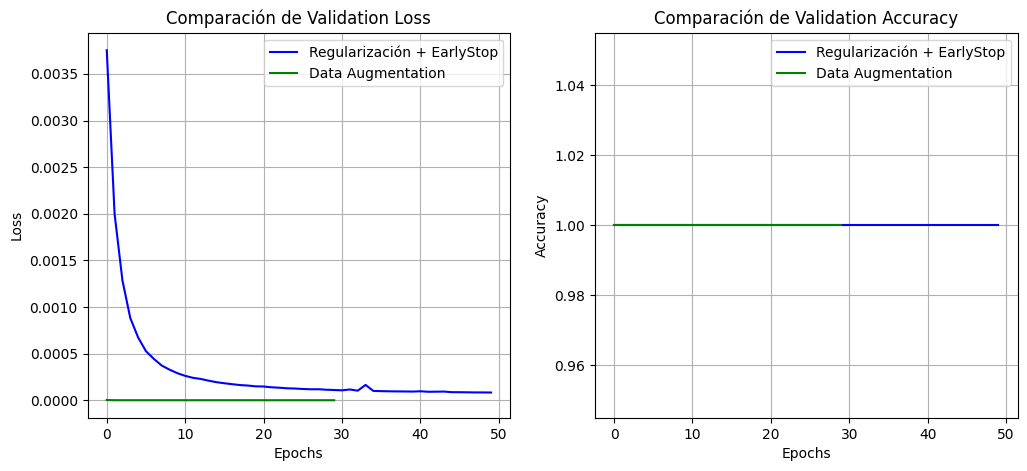

In [4]:
# ===============================================
# 4.2 IMPLEMENTACIÓN DE 2 ESTRATEGIAS DE MEJORA (con F1, Recall, Precision)
# ===============================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers, regularizers, callbacks

# ----------------------
# Preparar dataset sintético (ejemplo)
# ----------------------
X = df_sintetico.select_dtypes(include=["number"]).drop(columns=["target"])
y = df_sintetico["target"].replace({-1:0})  # 👈 TensorFlow no acepta -1

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------
# Estrategia 1: Regularización + Early Stopping
# ----------------------
model1 = models.Sequential([
    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(len(y.unique()), activation="softmax")
])

model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
early_stop = callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val),
                      epochs=50, batch_size=64, callbacks=[early_stop], verbose=0)

# ----------------------
# Estrategia 2: Data Augmentation Tabular (ruido gaussiano)
# ----------------------
def add_gaussian_noise(X, noise_level=0.01):
    return X + np.random.normal(0, noise_level, X.shape)

X_aug = add_gaussian_noise(X_train, 0.05)
y_aug = y_train.copy()

X_train_aug = np.vstack([X_train, X_aug])
y_train_aug = np.hstack([y_train, y_aug])

model2 = models.Sequential([
    layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation="relu"),
    layers.Dense(len(y.unique()), activation="softmax")
])

model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history2 = model2.fit(X_train_aug, y_train_aug, validation_data=(X_val, y_val),
                      epochs=30, batch_size=64, verbose=0)

# ----------------------
# Evaluación en conjunto de validación
# ----------------------
y_pred1 = np.argmax(model1.predict(X_val), axis=1)
y_pred2 = np.argmax(model2.predict(X_val), axis=1)

metrics1 = {
    "F1": f1_score(y_val, y_pred1, average="macro"),
    "Precision": precision_score(y_val, y_pred1, average="macro"),
    "Recall": recall_score(y_val, y_pred1, average="macro")
}

metrics2 = {
    "F1": f1_score(y_val, y_pred2, average="macro"),
    "Precision": precision_score(y_val, y_pred2, average="macro"),
    "Recall": recall_score(y_val, y_pred2, average="macro")
}

print("\n📊 Estrategia 1 (Regularización + EarlyStopping):", metrics1)
print("📊 Estrategia 2 (Data Augmentation):", metrics2)

# ----------------------
# Comparación visual
# ----------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history1.history["val_loss"], label="Regularización + EarlyStop", color="blue")
plt.plot(history2.history["val_loss"], label="Data Augmentation", color="green")
plt.title("Comparación de Validation Loss")
plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.legend(); plt.grid()

plt.subplot(1,2,2)
plt.plot(history1.history["val_accuracy"], label="Regularización + EarlyStop", color="blue")
plt.plot(history2.history["val_accuracy"], label="Data Augmentation", color="green")
plt.title("Comparación de Validation Accuracy")
plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.legend(); plt.grid()

plt.show()
